<a href="https://colab.research.google.com/github/pagrkonecta/Konecta_Test/blob/main/Konecta_PAGR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


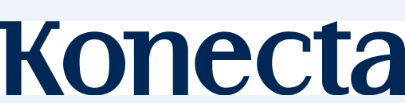

#**TECHNICAL TEST FOR THE SELECTION PROCESS OF THE COMPANY KONECTA**
#**---------------ANALYST DATA SCIENTIST---------------**

#Paola Andrea Giraldo Ramírez 
#Environmental Engineer
#March 2023

# Problem to be solved
In recent years, the credit card issuers in Taiwan faced the cash and credit card debt crisis and the delinquency was expected to peak in the third quarter  of 2006 (Chou,2006). In order to increase market share, card-issuing banks in Taiwan over-issued cash and credit cards to unqualified applicants. At the same time, most cardholders, irrespective of their repayment ability, overused credit cards for consumption and accumulated heavy credit and cash–card debts. The crisis caused a blow to consumer finance confidence and it is a big challenge for both banks and cardholders.

## Dataset

This data were colected between April and September 2005, from an importan bank in Taiwan which issues both cash and credit cards. The researchers used a binary variable to represent default payment, where Yes was coded as 1 and No was coded as 0. This variable was considered the response variable in the study. The dataset contains 30000 total number of instances. The data will be download and imported from UCI ML repository: 

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients 


### Variables

This dataset has 24 variables, in which 23 are explanatory variables, and one which is the variable to be predicted some are user personal information, other related with amount of bill statement and the amount of previous payment in a specific month. Each variable will be described below: 

_______________________________________________
*Variable to be predicted:*

*   **default payment next month**: Refers to credit card holders are defaulters or non-defaulters (1 = yes; 0 = no)

_______________________________________________
*User personal information:*

*   **ID**: Identity of each client (From 1 to 3000) - Categorical variable.
*   **LIMIT_BAL**: Total credit (Between 1000 and 1000000, given in Taiwan Dollars) it includes both the individual consumer credit and his/her family (supplementary) credit.
*   **SEX**: Gender (1 = Male; 2 = Female) - Categorical variable.
*   **EDUCATION**: Level of education (1 = Graduate school; 2 = University; 3 = High school; 4 = Others) -  Categorical variable.
*   **MARRIAGE**: Marital status (1 = married; 2 = single; 3 = others) - Categorical variable.
*   **AGE**: Age in years - 

_______________________________________________
*History of past payments (This variables track the past monthly payment records, i.e. the delay of the payment referred to a specific month):* 

*   **PAY_0**: Repayment status in September  
*   **PAY_2**: Repayment status in August
*   **PAY_3**: Repayment status in July
*   **PAY_4**: Repayment status in June
*   **PAY_5**: Repayment status in May
*   **PAY_6**: Repayment status in April

*(The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above)*


_______________________________________________
*Amount of bill statement:*

*   **BILL_AMT1**: Amount of bill statement in September
*   **BILL_AMT2**: Amount of bill statement in August
*   **BILL_AMT**: Amount of bill statement in July
*   **BILL_AMT4**: Amount of bill statement in Jun
*   **BILL_AMT5**: Amount of bill statement in May
*   **BILL_AMT6**: Amount of bill statement in April

*(New Taiwan dollar)*


_______________________________________________
*amount of previous payment:*

*   **PAY_AMT1**: Amount of previous payment in September
*   **PAY_AMT2**: Amount of previous payment in August
*   **PAY_AMT3**: Amount of previous payment in July
*   **PAY_AMT4**: Amount of previous payment in June
*   **PAY_AMT5**: Amount of previous payment in May
*   **PAY_AMT6**: Amount of previous payment in April

*(New Taiwan dollar) -  Categorical variable.*



# Solution

### Import libraries/packages

In [159]:
# Data treatment
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib as mpl

# Preprocessing and modeling
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
import shap




# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('once')

# Conect to Colab 
# ==============================================================================
from google.colab import drive
from google.colab import files

## Data

### Download data

In [160]:
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/default of credit card clients.xls', skiprows = [0])
df.head()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [161]:
# creat a copy in case we need variables in the format of number for analysis
df_original=df.copy()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


## EDA

In [162]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


**his dataset has 30000 samples, the average Credit Limit is 167484, the majority of the samples are female and the average age is 35 years old.**

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


<Axes: >

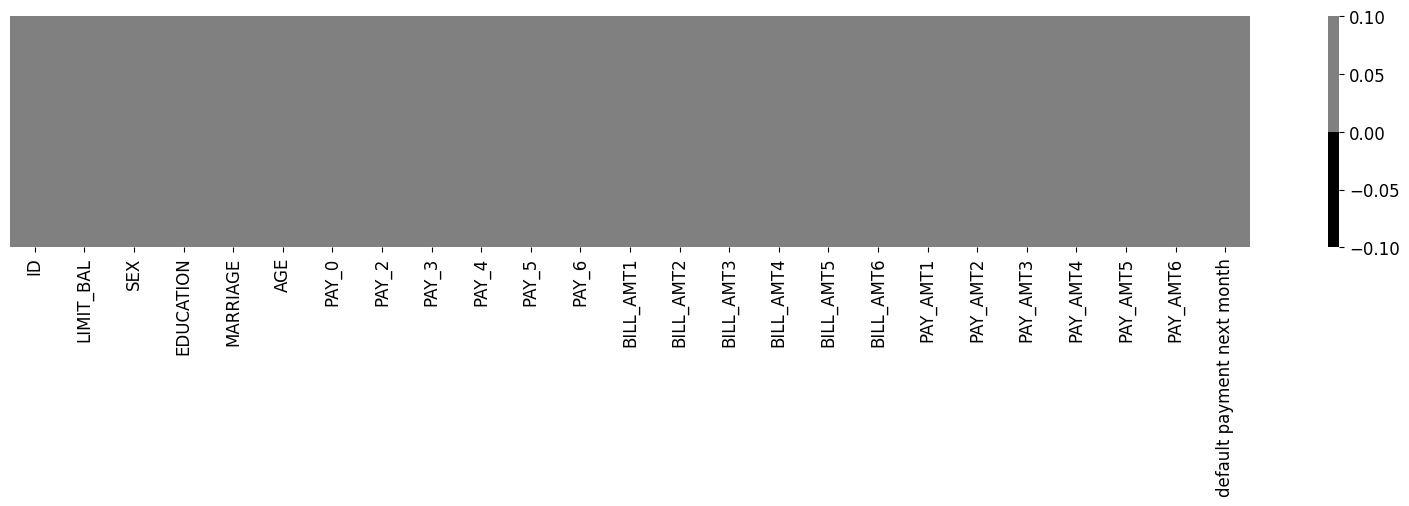

In [163]:
plt.figure(figsize=(20, 3))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap=ListedColormap(['black','gray']))

**The dataset does not contain null values, therefore it is not necessary to impute the data.**

### Numérical and categorical data


In [164]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [165]:
#Drop 'ID' column and rename 'default payment next month'
df = df.drop(axis=1, columns='ID')
df.reset_index()
df['DEFAULT'] = df['default payment next month'].astype('category')
df = df.drop(axis=1, columns='default payment next month')
# rename variable 'PAY_0' to 'PAY_1' 
df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [166]:
df_num = df[['LIMIT_BAL','AGE', 
               'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
               'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
df_cat = df[['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','DEFAULT']]

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


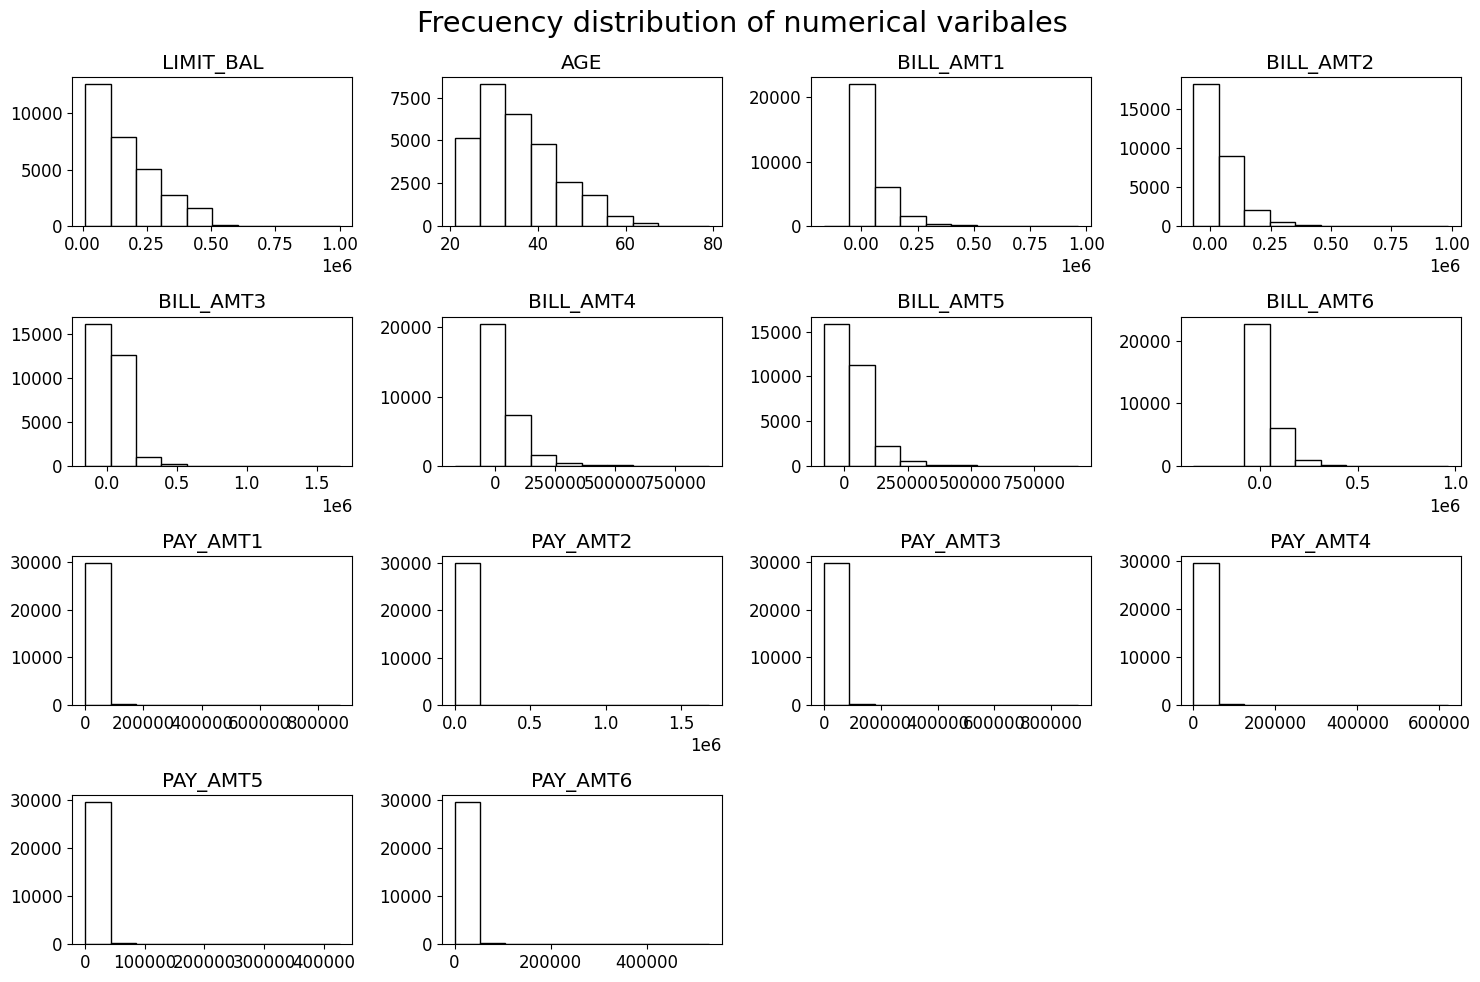

In [167]:
#Generating frequency distribution histograms of numerical variables
hist_num = df_num.iloc[:,:].hist(figsize=(15,10), color='white', edgecolor='black', grid=False)
plt.suptitle('Frecuency distribution of numerical varibales', ha='center', fontsize='xx-large')
plt.tight_layout()

**All the graphs are very right skewed.**

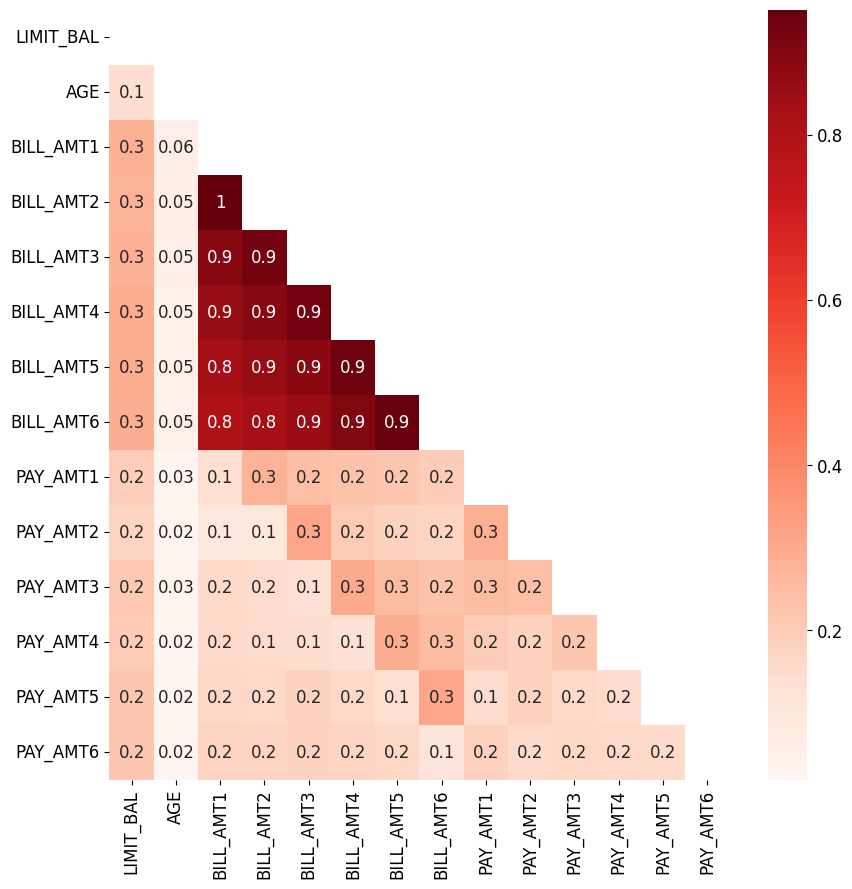

In [168]:
#Plot correlation plot
plt.figure(figsize=(10, 10))
corr_mask = np.triu(df_num.corr())
h_map = sns.heatmap(df_num.corr(), mask=corr_mask, annot=True, cmap='Reds',fmt='.1g', xticklabels='auto')
plt.yticks(rotation=360, fontsize= 12)
plt.xticks(rotation=90, fontsize= 12)
plt.show()

**The biggest correlations are among bill amounts this variable shows a high positive correlation, the rest of the variables are not correlated significantly.**

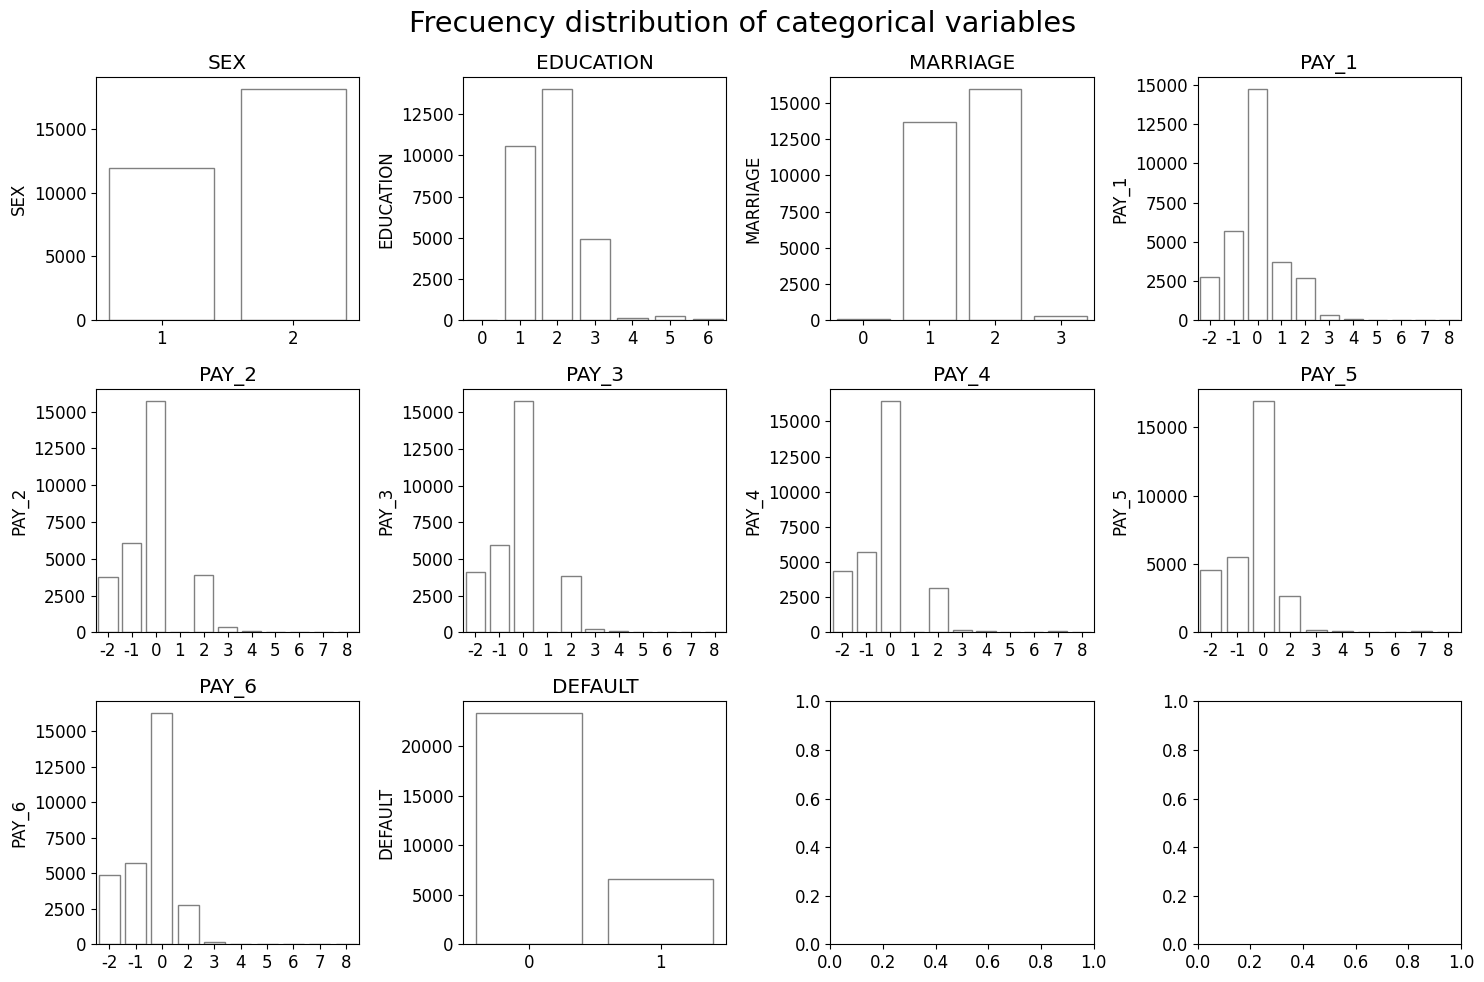

In [169]:
#Categorical variables
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for i, ax in zip(df_cat.columns, axes.flatten()):
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts(),
                errcolor='.5', linewidth=1, edgecolor='.5', facecolor=(0, 0, 0, 0),
                ax=ax).set_title(i)
plt.suptitle('Frecuency distribution of categorical variables', ha='center', fontsize='xx-large')
plt.tight_layout()
plt.show()

**The response variable 'DEFAULT' is highly unbalanced.**

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


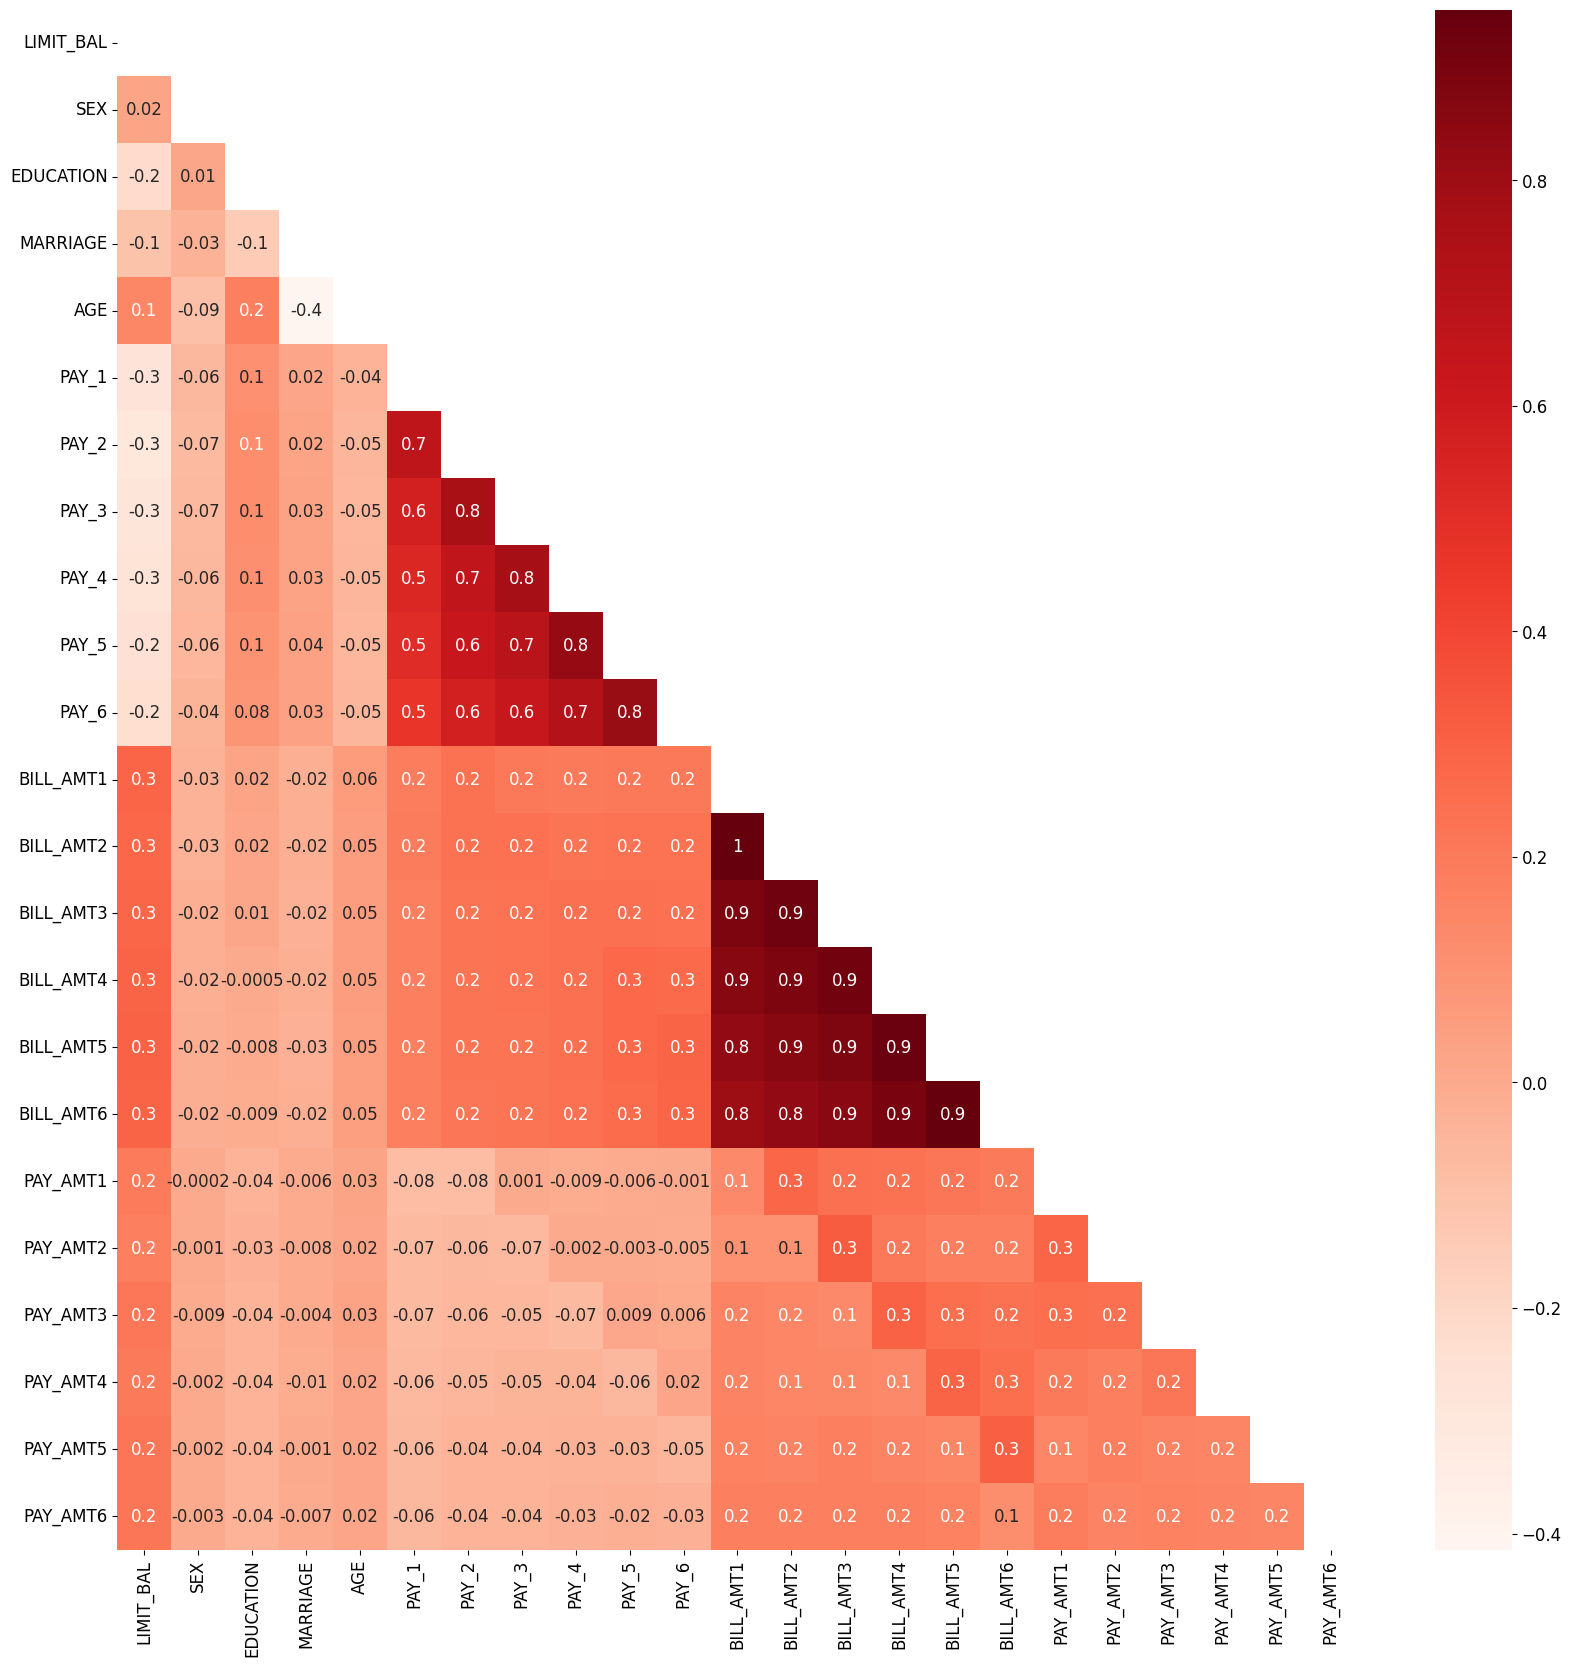

In [170]:
#Plot correlation plot
plt.figure(figsize=(20, 20))
corr_mask = np.triu(df.corr())
h_map = sns.heatmap(df.corr(), mask=corr_mask, annot=True, cmap='Reds',fmt='.1g', xticklabels='auto')
plt.yticks(rotation=360, fontsize= 12)
plt.xticks(rotation=90, fontsize= 12)
plt.show()

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 [Text(0, -5.0, '−5'),
  Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25')])

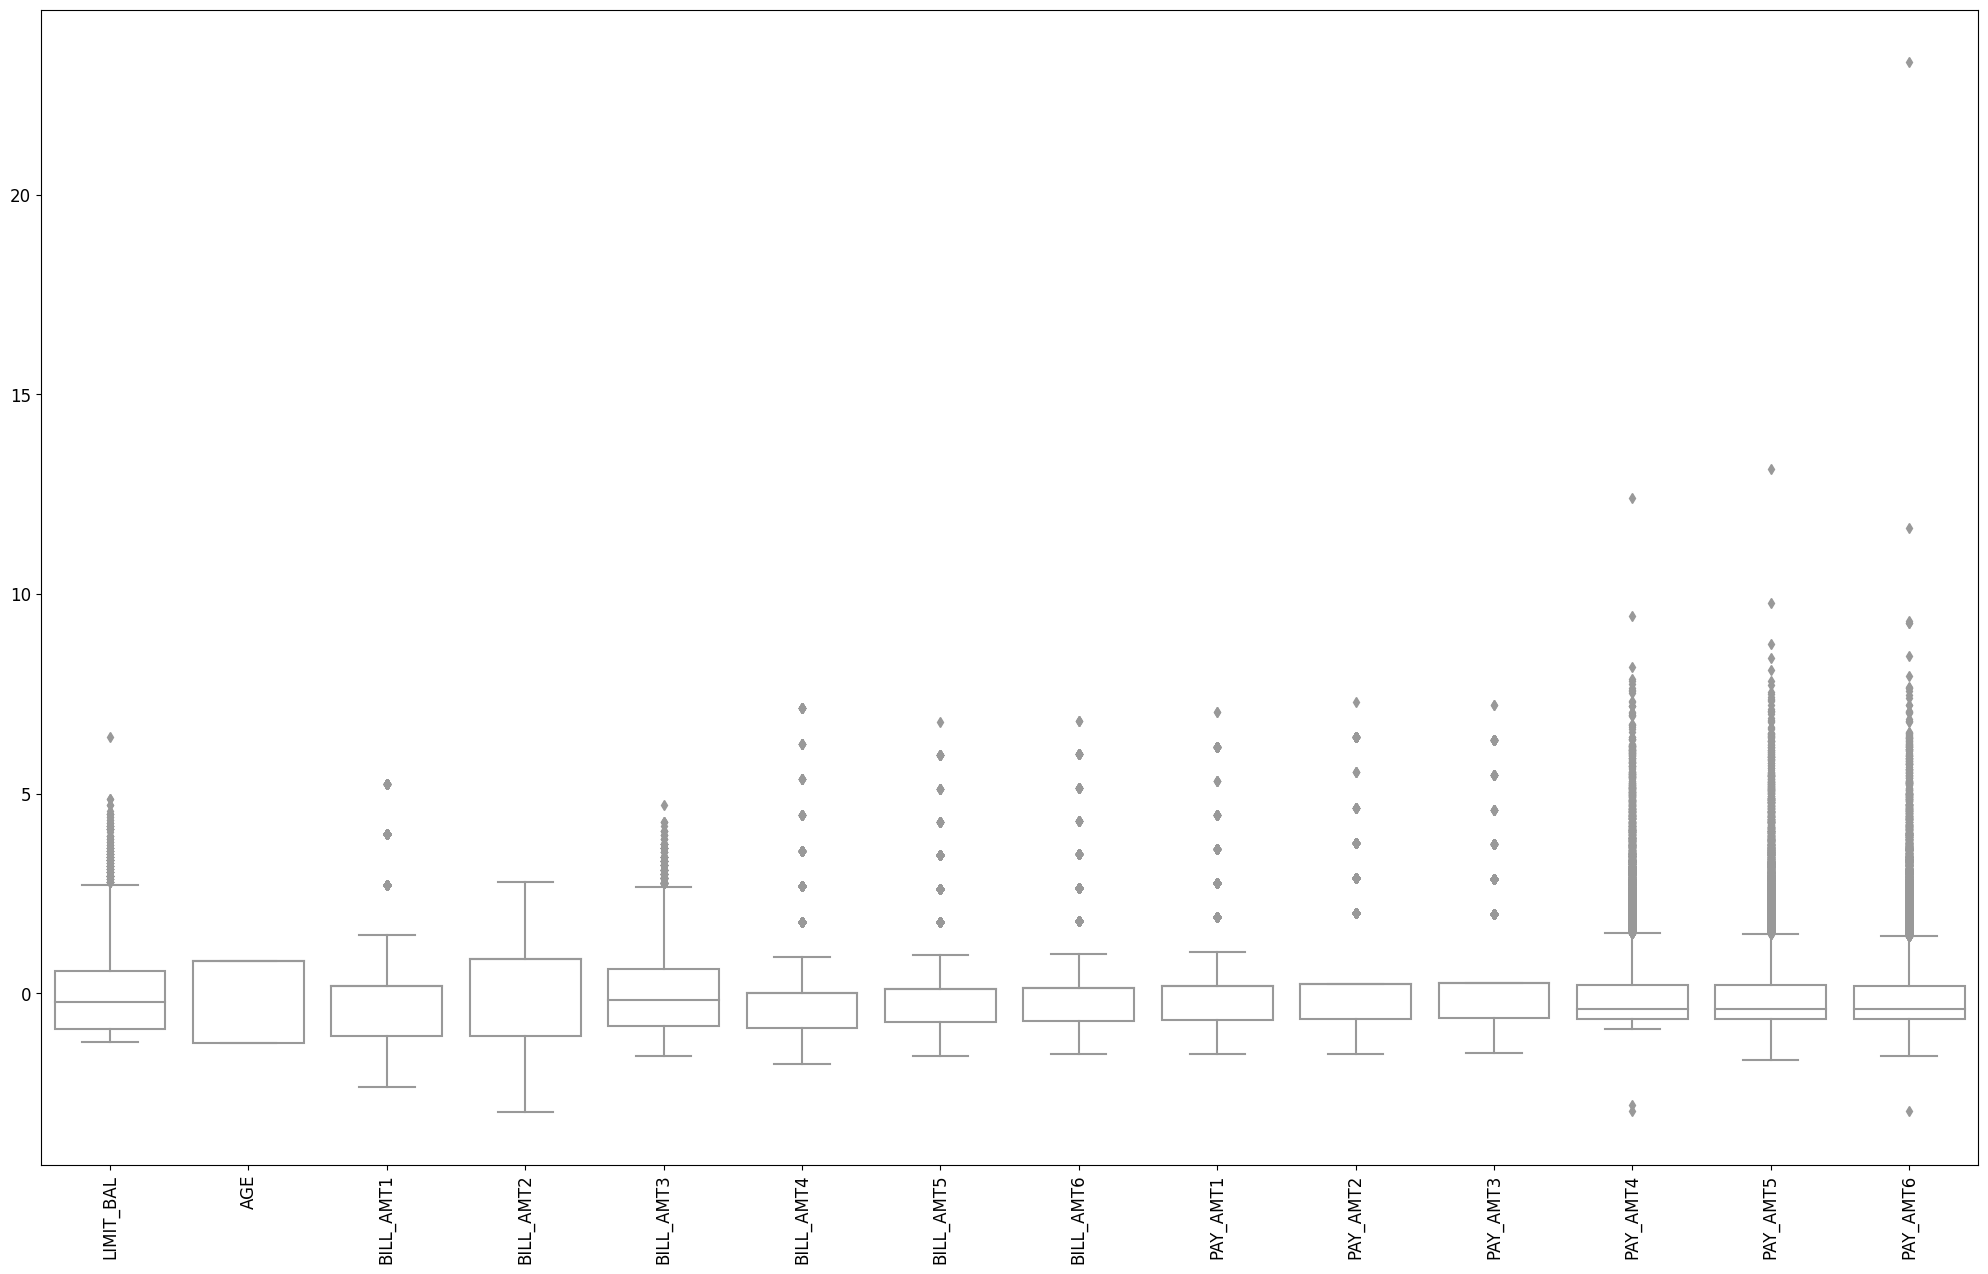

In [171]:
# Standard Scaler to idenfity outliers
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# BOXPLOT
cols = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
        'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

fig=plt.figure(1, figsize=(25,15))
ax=fig.add_subplot(111)
sns.boxplot(data=scaled_data[:,:-10], color='white')
plt.xticks(np.arange(0,14), labels=cols, rotation=90, fontsize=12)
plt.yticks(fontsize=12)

**Here we can identify many outliers, but none of those samples will be discarded due to a lack of knowledge in the dataset.**

## Data cleaning and preprocessing

### Errors in the dataset

In [172]:
# Check for duplicate rows and remove duplicate rows.
print(f'There are {df.duplicated().sum()} duplicate rows in the data set')

df=df.drop_duplicates()
print('The duplicate rows were removed')

There are 35 duplicate rows in the data set
The duplicate rows were removed


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [173]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,29965.0,167442.005006,129760.135222,10000.0,50000.0,140000.0,240000.0,1000000.0
SEX,29965.0,1.603738,0.489128,1.0,1.0,2.0,2.0,2.0
EDUCATION,29965.0,1.853629,0.790411,0.0,1.0,2.0,2.0,6.0
MARRIAGE,29965.0,1.551877,0.521997,0.0,1.0,2.0,2.0,3.0
AGE,29965.0,35.487969,9.219459,21.0,28.0,34.0,41.0,79.0
PAY_1,29965.0,-0.016753,1.123492,-2.0,-1.0,0.0,0.0,8.0
PAY_2,29965.0,-0.131854,1.196322,-2.0,-1.0,0.0,0.0,8.0
PAY_3,29965.0,-0.164392,1.195878,-2.0,-1.0,0.0,0.0,8.0
PAY_4,29965.0,-0.218922,1.168175,-2.0,-1.0,0.0,0.0,8.0
PAY_5,29965.0,-0.264509,1.132220,-2.0,-1.0,0.0,0.0,8.0


In [174]:
df.nunique()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


LIMIT_BAL       81
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             56
PAY_1           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
DEFAULT          2
dtype: int64

**EDUCATION, MARRIAGE, and PAY_ Contains more categories than those described in the repository where the information was obtained.**

In [175]:
# Identifying unique values and quantity of each value
df['EDUCATION'].value_counts()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


2    14019
1    10563
3     4915
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

**For variable EDUCATION, values = 0, 5 and 6 were not described in the dataset information, therefore they will be removed considering that they are not a significant amount of data and do not affect the dataset.**


In [176]:
# drop rows where column EDUCATION has the values 0, 5 and 6
df = df[~df['EDUCATION'].isin([0, 5, 6])]

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [177]:
# Verifying that values ​​have been removed
df['EDUCATION'].value_counts()

2    14019
1    10563
3     4915
4      123
Name: EDUCATION, dtype: int64

In [178]:
# Counting the number of values ​​for each category
df['MARRIAGE'].value_counts()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


2    15787
1    13461
3      318
0       54
Name: MARRIAGE, dtype: int64

**As in the previous analysis, the MARRIAGE variable does not have an associated category for the value 0, so it will also be eliminated.**

In [179]:
# drop rows where column MARRIAGE has the value 0
df = df.drop(df[df['MARRIAGE'] == 0].index)

# Counting the number of values ​​for each category
df['MARRIAGE'].value_counts()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


2    15787
1    13461
3      318
Name: MARRIAGE, dtype: int64

In [180]:
# Identifying unique values  PAY_ variables 
df_pay = df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

# loop through each column and extract value counts
for col in df_pay.columns:
    print(f'Value counts for column {col}:')
    print(df_pay[col].value_counts())
    print('\n')

Value counts for column PAY_1:
 0    14499
-1     5629
 1     3641
-2     2699
 2     2639
 3      320
 4       76
 5       24
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64


Value counts for column PAY_2:
 0    15476
-1     5986
 2     3903
-2     3692
 3      326
 4       97
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64


Value counts for column PAY_3:
 0    15518
-1     5859
-2     3997
 2     3802
 3      237
 4       75
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64


Value counts for column PAY_4:
 0    16204
-1     5613
-2     4257
 2     3142
 3      180
 4       68
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64


Value counts for column PAY_5:
 0    16684
-1     5476
-2     4449
 2     2617
 3      177
 4       83
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64


Value counts for column PAY_6:
 0    16053
-1     5670
-2

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


**Looking for some information about the dataset and according to the autor who created the data set: the values in PAY_ has this description: 
-2: No consumption; -1: Paid in full; 0: The use of revolving credit;
1 = payment delay for one month; 2 = payment delay for two months; ...; 
8 = payment delay for eight months; 9 = payment delay for nine months and above.
Whit this information I will not do nothing with this variable and I will use it to build my model in the way data it is.**

### One-hot encoding for categorical variables

**In some cases, using an integer encoding for categorical variables may create an artificial order that does not actually exist. To avoid this issue, a one-hot encoding technique can be applied. For example, features like SEX, MARRIAGE, EDUCATION and PAY_X can be converted into binary vectors to eliminate any orders that in this case have no meanings.**

In [86]:
# Set 'category' type to categorical attributes
for i in ['SEX', 'EDUCATION', 'MARRIAGE']:
  df[i] = df[i].astype('category')

# one-hot encoding
df=pd.concat([pd.get_dummies(df['SEX'], prefix='SEX'),
                pd.get_dummies(df['EDUCATION'], prefix='EDUCATION'), 
                pd.get_dummies(df['MARRIAGE'], prefix='MARRIAGE'),
                pd.get_dummies(df['PAY_1'], prefix='PAY_1'),
                pd.get_dummies(df['PAY_2'], prefix='PAY_2'),
                pd.get_dummies(df['PAY_3'], prefix='PAY_3'),
                pd.get_dummies(df['PAY_4'], prefix='PAY_4'),
                pd.get_dummies(df['PAY_5'], prefix='PAY_5'),
                pd.get_dummies(df['PAY_6'], prefix='PAY_6'),              
                df],axis=1)

# drop original columns
df.drop(['EDUCATION'],axis=1, inplace=True)
df.drop(['SEX'],axis=1, inplace=True)
df.drop(['MARRIAGE'],axis=1, inplace=True)
df.drop(['PAY_1'],axis=1, inplace=True)
df.drop(['PAY_2'],axis=1, inplace=True)
df.drop(['PAY_3'],axis=1, inplace=True)
df.drop(['PAY_4'],axis=1, inplace=True)
df.drop(['PAY_5'],axis=1, inplace=True)
df.drop(['PAY_6'],axis=1, inplace=True)


# print samples
df.head()

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,689,0,0,0,0,1
1,0,1,0,1,0,0,0,1,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,0,1,0,1,0,0,0,1,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0,1,0,1,0,0,1,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,1,0,0,1,0,0,1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Aleatory sample

**It is important that the target variable is balanced because it affects the performance and interpretation of machine learning models. Having a balanced target variable ensures that the model has an equal representation of both classes, making it more likely to perform well on both classes. Therefore, were selected randomly samples wiht the half number of samples of each category of the target and thus have a balanced sample.**

In [87]:
# shuffle the dataframe rows
df = df.sample(frac=1, random_state=42)

# select 5000 samples from each category
sample_size = 5000
category_a_sample = df[df['DEFAULT'] == 0].sample(n=sample_size, random_state=42)
category_b_sample = df[df['DEFAULT'] == 1].sample(n=sample_size, random_state=42)

# concatenate the two samples
dff = pd.concat([category_a_sample, category_b_sample])

 # shuffle the rows randomly
dff = dff.sample(frac=1, random_state=42) 

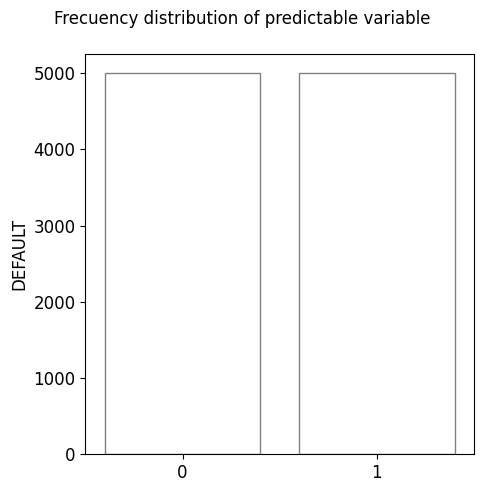

In [88]:
#Target 
plt.figure(figsize=(5, 5))
sns.barplot(x=dff['DEFAULT'].value_counts().index, y=dff['DEFAULT'].value_counts(),
                errcolor='.5', linewidth=1, edgecolor='.5', facecolor=(0, 0, 0, 0))
plt.suptitle('Frecuency distribution of predictable variable', ha='center', fontsize=12)
plt.tight_layout()
plt.show()

In [89]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Modeling

**Random Forest is a good solution for categorical variables because it can handle them naturally without requiring any special pre-processing or encoding of the data. Unlike linear models that assume a linear relationship between the input features and output variable, Random Forest can handle non-linear relationships and interactions between variables. Random Forest can also handle missing values and noisy data quite well, which is particularly important when dealing with real-world datasets that often contain incomplete or erroneous data. Furthermore, Random Forest can handle both continuous and categorical variables and can capture interactions between them. It does this by randomly selecting a subset of features at each split of the tree, which helps prevent overfitting and improves generalization performance.**

**Overall, Random Forest is a powerful and flexible model that can handle a wide range of data types, including categorical variables, making it a popular choice in many applications. The Random Forest algorithm has been selected for this project because numerous studies in recent years have used it to analyze data from banking information, as is the case in this study. It has been reported that the Random Forest algorithm performs well in comparison to other classification algorithms in these types of studies. Therefore, the analyses will be based on this model. Here are some related studies:** 



*   **A COMPARISON OF RANDOM FOREST AND LOGISTIC REGRESSION MODEL IN CREDIT SCORING OF RURAL HOUSEHOLDS. Nhung, D. &  Simioni M., 2021.**
*   **A STUDY ON PREDICTING LOAN DEFAULT BASED ON THE RANDOM FOREST ALGORITHM. Zhu L. et al., 2023** 
*   **IMPLEMENTATION AND DESIGN ONFRAUD DETECTION AND PREDICTION OF MOBILE MONEY TRANSACTION USING ML TECHNIQUES. Balani N. et al., 2021.**



### Modeling N° 1

**The first experiment was performed by converting all categorical features in the dataset to dummy features without hyperparameter Tuning.**:

In [105]:
# Split the data into features and target variable
X = dff.drop('DEFAULT', axis=1)
y = dff['DEFAULT']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [106]:
# Check dimensions
print(np.shape(X_train))
print(np.shape(X_test))

print("Training set:")
print(f"  Non-defaulters (y=0): {len(y_train[y_train==0])}")
print(f"  Defaulters (y=1):\t {len(y_train[y_train==1])}")

print("Test set:")
print(f"  Non-defaulters (y=0): {len(y_test[y_test==0])}")
print(f"  Defaulters (y=1):\t {len(y_test[y_test==1])}")

(8000, 87)
(2000, 87)
Training set:
  Non-defaulters (y=0): 4009
  Defaulters (y=1):	 3991
Test set:
  Non-defaulters (y=0): 991
  Defaulters (y=1):	 1009


In [107]:
# Model
Random_Forest = RandomForestClassifier(max_depth=3, random_state=123).fit(X_train, y_train)
y_pred_Random_Forest = Random_Forest.predict(X_test)

# Score
print('Classification Report:\n', classification_report(y_test, y_pred_Random_Forest))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_Random_Forest))
Random_Forest_train_acc = Random_Forest.score(X_train, y_train)
print('Training Score:', Random_Forest_train_acc)
Random_Forest_test_acc = Random_Forest.score(X_test, y_test)
print('Testing Score:', Random_Forest_test_acc)

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.81      0.74       991
           1       0.77      0.62      0.68      1009

    accuracy                           0.71      2000
   macro avg       0.72      0.71      0.71      2000
weighted avg       0.72      0.71      0.71      2000

Confusion Matrix:
 [[802 189]
 [387 622]]
Training Score: 0.71675
Testing Score: 0.712


**The accuracy score of the training set is 0.712 , while the accuracy of the test set is 0.7165. These two values ​​are quite comparable. Therefore, there are no signs of overfitting.**

### Modeling N°2

**The second experiment was performed by converting all categorical features in the dataset to dummy features and with hyperparameter Tuning.** 

**By combining grid search and cross-validation, we can identify the optimal hyperparameters for a machine learning model while obtaining a reliable estimate of its performance. This is especially important when working with complex models or datasets, as it helps to ensure that the model is well-tuned and generalizes well to new data.**

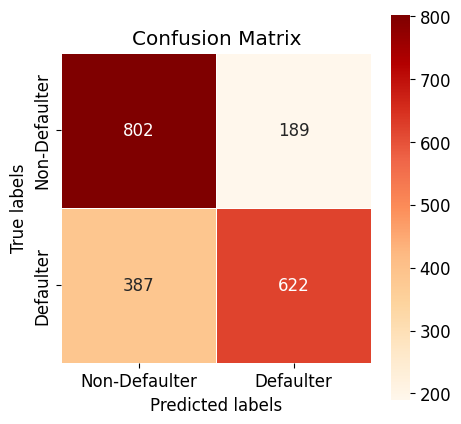

In [108]:
# Performance

cm_Random_Forest = confusion_matrix(y_test, y_pred_Random_Forest)

mpl.rcParams['pdf.fonttype']=42
mpl.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(20, 20)
plt.rcParams['figure.dpi'] = 100

colors=sns.color_palette('rocket', 5)

fig = plt.figure(figsize=(5, 5))

ax = plt.subplot()
sns.heatmap(cm_Random_Forest, cmap='OrRd', annot=True, fmt='g', ax=ax, square=True, linecolor='white', linewidth=0.5)  # Annot=True to annotate cells, fmt='g' to disable scientific notation

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Non-Defaulter', 'Defaulter'])
ax.yaxis.set_ticklabels(['Non-Defaulter', 'Defaulter'])
plt.show()

**The confusion matrix shows 802 + 622 = 1424 correct predictions and 387 + 189 = 576 incorrect predictions.**

* **True Negatives (Actual Negative:0 and Predict Negative:0) - 802**
* **True Positives (Actual Positive:1 and Predict Positive:1) - 622**
* **False Negatives (Actual Positive:1 but Predict Negative:0) - 387 (Type II error)**
* **False Positives (Actual Negative:0 but Predict Positive:1) - 189 (Type I error)**

In [109]:
from sklearn.metrics import accuracy_score, f1_score, log_loss, precision_score, recall_score, roc_auc_score

Random_Forest_Accuracy_score = accuracy_score(y_test, y_pred_Random_Forest)
print('Accuracy Score: {:.4f}'.format(Random_Forest_Accuracy_score))

Random_Forest_F1_score = f1_score(y_test, y_pred_Random_Forest, average="binary")
print('F1 Score: {:.4f}'.format(Random_Forest_F1_score))

Random_Forest_Log_loss = log_loss(y_test, y_pred_Random_Forest)
print('Log Loss: {:.4f}'.format(Random_Forest_Log_loss))

Random_Forest_Precision_score = precision_score(y_test, y_pred_Random_Forest)
print('Precision Score: {:.4f}'.format(Random_Forest_Precision_score))

Random_Forest_Recall_score = recall_score(y_test, y_pred_Random_Forest)
print('Recall Score: {:.4f}'.format(Random_Forest_Recall_score))

Random_Forest_Roc_auc_score = roc_auc_score(y_test, y_pred_Random_Forest)
print('ROC-AUC Score: {:.4f}'.format(Random_Forest_Roc_auc_score))

Accuracy Score: 0.7120
F1 Score: 0.6835
Log Loss: 10.3806
Precision Score: 0.7670
Recall Score: 0.6165
ROC-AUC Score: 0.7129


In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score
# Grid of evaluated hyperparameters Tunning
# ==============================================================================
param_grid = {'n_estimators': [150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20],
              'criterion'   : ['gini', 'entropy']
             }

# Grid search with cross validation
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        cv         = StratifiedKFold(n_splits=5, shuffle=True, random_state = 123),
        scoring    = 'recall',
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Results
# ==============================================================================
results = pd.DataFrame(grid.cv_results_)
results.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
21,entropy,20,5,150,0.646952,0.018935,0.972313,0.001917
22,entropy,20,7,150,0.646950,0.021428,0.982962,0.001788
10,gini,20,7,150,0.644948,0.018290,0.986219,0.002216
11,gini,20,9,150,0.644946,0.021020,0.990666,0.001474


In [112]:
# S Get the score and top 5
score_df = pd.DataFrame(grid.cv_results_)
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
21,2.024174,0.351973,0.089259,0.007026,entropy,20,5,150,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.659574,...,0.646952,0.018935,1,0.971178,0.969934,0.975572,0.971813,0.973066,0.972313,0.001917
22,2.401822,0.379905,0.090687,0.009706,entropy,20,7,150,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.668335,...,0.646950,0.021428,2,0.984649,0.980583,0.982775,0.981522,0.985280,0.982962,0.001788
10,1.948411,0.240590,0.085798,0.006082,gini,20,7,150,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.655820,...,0.644948,0.018290,3,0.984023,0.983714,0.988099,0.985907,0.989352,0.986219,0.002216
11,2.440821,0.455472,0.087014,0.007328,gini,20,9,150,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.667084,...,0.644946,0.021020,4,0.990288,0.988099,0.992484,0.990918,0.991544,0.990666,0.001474
23,2.984112,0.494427,0.089345,0.008120,entropy,20,9,150,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.660826,...,0.644697,0.024363,5,0.987155,0.984341,0.989978,0.981209,0.988725,0.986282,0.003159


In [113]:
# Define the parameters for the best model
Random_Forest_best = grid.best_estimator_

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [114]:
y_pred_Random_Forest_best_test = Random_Forest_best.predict(X_test)
y_pred_Random_Forest_best_train = Random_Forest_best.predict(X_train)

# Score test
print('Test Classification Report:\n', classification_report(y_test, y_pred_Random_Forest_best_test))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_Random_Forest_best_test))
Random_Forest_best_test_acc = Random_Forest_best.score(X_test, y_test)
print('Testing Accuracy:', Random_Forest_best_test_acc)

# Score train
print('Train Classification Report:\n', classification_report(y_train, y_pred_Random_Forest_best_train))
print('Confusion Matrix:\n', confusion_matrix(y_train, y_pred_Random_Forest_best_train))
Random_Forest_best_train_acc = Random_Forest_best.score(X_train, y_train)
print('Training Accuracy:', Random_Forest_best_train_acc)

Test Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.78      0.73       991
           1       0.75      0.65      0.70      1009

    accuracy                           0.72      2000
   macro avg       0.72      0.72      0.71      2000
weighted avg       0.72      0.72      0.71      2000

Confusion Matrix:
 [[774 217]
 [352 657]]
Testing Accuracy: 0.7155
Train Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      4009
           1       0.98      0.97      0.97      3991

    accuracy                           0.97      8000
   macro avg       0.97      0.97      0.97      8000
weighted avg       0.97      0.97      0.97      8000

Confusion Matrix:
 [[3936   73]
 [ 136 3855]]
Training Accuracy: 0.973875


<font color='red'>La puntuación de precisión del conjunto de entrenamiento es $0.9284$, mientras que la precisión del conjunto de prueba es $0.7691$. Pueden ser signos de sobreajuste.</font> 

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


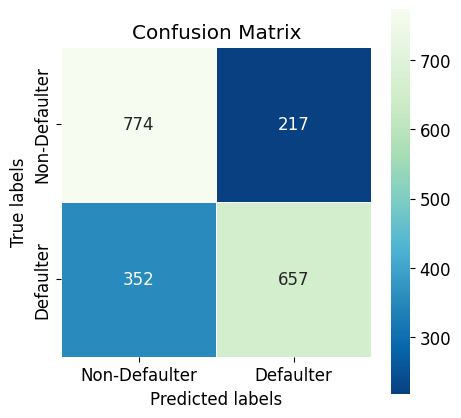

In [115]:
cm_Random_Forest_best = confusion_matrix(y_test, y_pred_Random_Forest_best_test)

mpl.rcParams['pdf.fonttype']=42
mpl.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(20, 20)
plt.rcParams['figure.dpi'] = 100


colors=sns.color_palette('rocket', 5)

fig = plt.figure(figsize=(5, 5))

ax = plt.subplot()
sns.heatmap(cm_Random_Forest_best, cmap='GnBu_r', annot=True, fmt='g', ax=ax, square=True, linecolor='white', linewidth=0.5)  # Annot=True to annotate cells, fmt='g' to disable scientific notation

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Non-Defaulter', 'Defaulter'])
ax.yaxis.set_ticklabels(['Non-Defaulter', 'Defaulter'])
plt.show()

The confusion matrix shows 483 + 480 = 963 correct predictions and 161 + 128 = 289 incorrect predictions.

* True Positives (Actual Positive:1 and Predict Positive:1) - 483
* True Negatives (Actual Negative:0 and Predict Negative:0) - 480
* False Positives (Actual Negative:0 but Predict Positive:1) - 161 (Type I error)
* False Negatives (Actual Positive:1 but Predict Negative:0) - 128 (Type II error)

In [116]:
from sklearn.metrics import accuracy_score, f1_score, log_loss, precision_score, recall_score, roc_auc_score

Random_Forest_best_Accuracy_score = accuracy_score(y_test, y_pred_Random_Forest_best_test)
print('Accuracy Score: {:.4f}'.format(Random_Forest_best_Accuracy_score))

Random_Forest_best_F1_score = f1_score(y_test, y_pred_Random_Forest_best_test, average="binary")
print('F1 Score: {:.4f}'.format(Random_Forest_best_F1_score))

Random_Forest_best_Log_loss = log_loss(y_test, y_pred_Random_Forest_best_test)
print('Log Loss: {:.4f}'.format(Random_Forest_best_Log_loss))

Random_Forest_best_Precision_score = precision_score(y_test, y_pred_Random_Forest_best_test)
print('Precision Score: {:.4f}'.format(Random_Forest_best_Precision_score))

Random_Forest_best_Recall_score = recall_score(y_test, y_pred_Random_Forest_best_test)
print('Recall Score: {:.4f}'.format(Random_Forest_best_Recall_score))

Random_Forest_best_Roc_auc_score = roc_auc_score(y_test, y_pred_Random_Forest_best_test)
print('ROC-AUC Score: {:.4f}'.format(Random_Forest_best_Roc_auc_score))

Accuracy Score: 0.7155
F1 Score: 0.6978
Log Loss: 10.2544
Precision Score: 0.7517
Recall Score: 0.6511
ROC-AUC Score: 0.7161


### Feature selection

**Feature selection is an important part of the Random Forest modeling process, as it can help improve accuracy and avoid overfitting. There are different methods to make this selection such as: Importance of features based on trees, selection based on models, selection based on correlation, selection based on SHAP importance, this last method will be selected in this project because  SHAP offers a powerful and flexible approach to feature selection that is highly interpretable and model-agnostic. By using SHAP to select features, we can gain a better understanding of how our models are making predictions and identify the most important features for a given task.**

In [117]:
shap_values = shap.TreeExplainer(Random_Forest).shap_values(X_train)

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


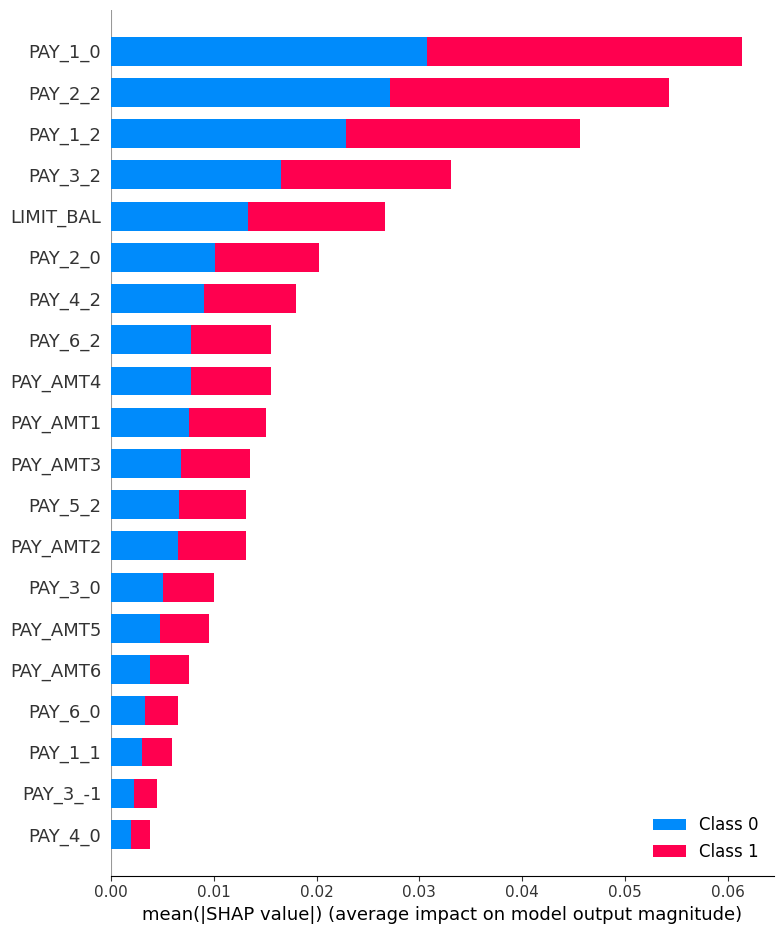

In [118]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

**Based on the most relevant characteristics obtained with SHAP, the 9 features that have the most influence on the model will be selected, this will allow us to have a more compact and probably more generalizable model.**

In [120]:
dff = dff[['PAY_1_0', 'PAY_2_2', 'PAY_1_2', 'PAY_3_2', 'LIMIT_BAL', 'PAY_2_0', 'PAY_4_2', 'PAY_6_2', 'PAY_AMT4', 'PAY_AMT1', 'PAY_AMT3',  'PAY_5_2', 'PAY_AMT2',  'PAY_3_0', 'PAY_AMT5', 'PAY_AMT6','PAY_6_0', 'PAY_1_1',  'PAY_3_-1', 'PAY_4_0', 'DEFAULT']]

### MODELADO MEJORADO CORREGIR NOMBRE ACÁ 


In [121]:
# Split the new data into features and target variable
X = dff.drop('DEFAULT', axis=1)
y = dff['DEFAULT']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [122]:
# Check dimensions
print(np.shape(X_train))
print(np.shape(X_test))

print("Training set:")
print(f"  Non-defaulters (y=0): {len(y_train[y_train==0])}")
print(f"  Defaulters (y=1):\t {len(y_train[y_train==1])}")

print("Test set:")
print(f"  Non-defaulters (y=0): {len(y_test[y_test==0])}")
print(f"  Defaulters (y=1):\t {len(y_test[y_test==1])}")

(8000, 20)
(2000, 20)
Training set:
  Non-defaulters (y=0): 4009
  Defaulters (y=1):	 3991
Test set:
  Non-defaulters (y=0): 991
  Defaulters (y=1):	 1009


In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Model
Random_Forest = RandomForestClassifier(max_depth=3, random_state=123).fit(X_train, y_train)
y_pred_Random_Forest = Random_Forest.predict(X_test)

# Score
print('Classification Report:\n', classification_report(y_test, y_pred_Random_Forest))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_Random_Forest))
Random_Forest_train_acc = Random_Forest.score(X_train, y_train)
print('Training Score:', Random_Forest_train_acc)
Random_Forest_test_acc = Random_Forest.score(X_test, y_test)
print('Testing Score:', Random_Forest_test_acc)

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.82      0.74       991
           1       0.78      0.60      0.68      1009

    accuracy                           0.71      2000
   macro avg       0.72      0.71      0.71      2000
weighted avg       0.72      0.71      0.71      2000

Confusion Matrix:
 [[815 176]
 [399 610]]
Training Score: 0.71775
Testing Score: 0.7125


**The accuracy score of the training set is 0.712 , while the accuracy of the test set is 0.7165. These two values ​​are quite comparable. Therefore, there are no signs of overfitting.**

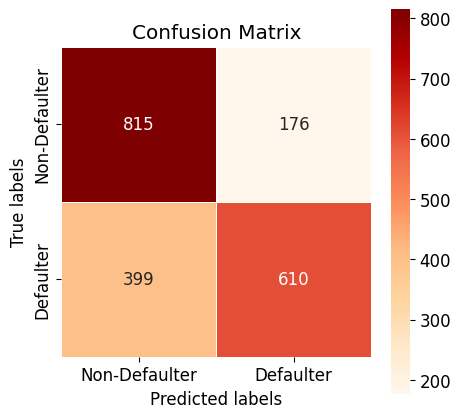

In [125]:
import matplotlib as mpl
# Performance
from sklearn.metrics import confusion_matrix

cm_Random_Forest = confusion_matrix(y_test, y_pred_Random_Forest)

mpl.rcParams['pdf.fonttype']=42
mpl.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(20, 20)
plt.rcParams['figure.dpi'] = 100

colors=sns.color_palette('rocket', 5)

fig = plt.figure(figsize=(5, 5))

ax = plt.subplot()
sns.heatmap(cm_Random_Forest, cmap='OrRd', annot=True, fmt='g', ax=ax, square=True, linecolor='white', linewidth=0.5)  # Annot=True to annotate cells, fmt='g' to disable scientific notation

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Non-Defaulter', 'Defaulter'])
ax.yaxis.set_ticklabels(['Non-Defaulter', 'Defaulter'])
plt.show()

**The confusion matrix shows 840 + 593 = 1433 correct predictions and 151 + 416 = 567 incorrect predictions.**

* **True Positives (Actual Positive:1 and Predict Positive:1) - 840**
* **True Negatives (Actual Negative:0 and Predict Negative:0) - 593**
* **False Positives (Actual Negative:0 but Predict Positive:1) - 151 (Type I error)**
* **False Negatives (Actual Positive:1 but Predict Negative:0) - 416 (Type II error)**

In [126]:
from sklearn.metrics import accuracy_score, f1_score, log_loss, precision_score, recall_score, roc_auc_score

Random_Forest_Accuracy_score = accuracy_score(y_test, y_pred_Random_Forest)
print('Accuracy Score: {:.4f}'.format(Random_Forest_Accuracy_score))

Random_Forest_F1_score = f1_score(y_test, y_pred_Random_Forest, average="binary")
print('F1 Score: {:.4f}'.format(Random_Forest_F1_score))

Random_Forest_Log_loss = log_loss(y_test, y_pred_Random_Forest)
print('Log Loss: {:.4f}'.format(Random_Forest_Log_loss))

Random_Forest_Precision_score = precision_score(y_test, y_pred_Random_Forest)
print('Precision Score: {:.4f}'.format(Random_Forest_Precision_score))

Random_Forest_Recall_score = recall_score(y_test, y_pred_Random_Forest)
print('Recall Score: {:.4f}'.format(Random_Forest_Recall_score))

Random_Forest_Roc_auc_score = roc_auc_score(y_test, y_pred_Random_Forest)
print('ROC-AUC Score: {:.4f}'.format(Random_Forest_Roc_auc_score))

Accuracy Score: 0.7125
F1 Score: 0.6797
Log Loss: 10.3626
Precision Score: 0.7761
Recall Score: 0.6046
ROC-AUC Score: 0.7135


In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score
# Grid of evaluated hyperparameters Tunning
# ==============================================================================
param_grid = {'n_estimators': [150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20],
              'criterion'   : ['gini', 'entropy']
             }

# Grid search with cross validation
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        cv         = StratifiedKFold(n_splits=5, shuffle=True, random_state = 123),
        scoring    = 'recall',
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Results
# ==============================================================================
results = pd.DataFrame(grid.cv_results_)
results.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
9,gini,20,5,150,0.642437,0.021905,0.973879,0.004066
21,entropy,20,5,150,0.638429,0.024871,0.970997,0.003708
6,gini,10,5,150,0.637677,0.023654,0.723691,0.002945
1,gini,None,7,150,0.637676,0.023270,0.991731,0.001530


In [129]:
# S Get the score and top 5
score_df = pd.DataFrame(grid.cv_results_)
score_df.nlargest(5,"mean_test_score")

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
9,1.945093,0.173857,0.081074,0.011501,gini,20,5,150,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.674593,...,0.642437,0.021905,1,0.977757,0.969621,0.975885,0.968368,0.977764,0.973879,0.004066
21,2.503731,0.317942,0.079078,0.008582,entropy,20,5,150,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.669587,...,0.638429,0.024871,2,0.971805,0.968995,0.975258,0.964923,0.974006,0.970997,0.003708
6,1.553592,0.271138,0.058442,0.006795,gini,10,5,150,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.669587,...,0.637677,0.023654,3,0.727444,0.721265,0.725650,0.719386,0.724710,0.723691,0.002945
1,2.680434,0.289399,0.083313,0.006206,gini,None,7,150,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.670839,...,0.637676,0.023270,4,0.990288,0.994049,0.989978,0.991544,0.992797,0.991731,0.001530
23,3.991546,0.481224,0.080087,0.009289,entropy,20,9,150,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.657071,...,0.637429,0.018670,5,0.973371,0.970247,0.972440,0.961791,0.977764,0.971123,0.005268


In [130]:
# Definir los parametros para el mejor modelo
Random_Forest_best = grid.best_estimator_

In [131]:
y_pred_Random_Forest_best_test = Random_Forest_best.predict(X_test)
y_pred_Random_Forest_best_train = Random_Forest_best.predict(X_train)

# Score test
print('Test Classification Report:\n', classification_report(y_test, y_pred_Random_Forest_best_test))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_Random_Forest_best_test))
Random_Forest_best_test_acc = Random_Forest_best.score(X_test, y_test)
print('Testing Accuracy:', Random_Forest_best_test_acc)

# Score train
print('Train Classification Report:\n', classification_report(y_train, y_pred_Random_Forest_best_train))
print('Confusion Matrix:\n', confusion_matrix(y_train, y_pred_Random_Forest_best_train))
Random_Forest_best_train_acc = Random_Forest_best.score(X_train, y_train)
print('Training Accuracy:', Random_Forest_best_train_acc)

Test Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.76      0.72       991
           1       0.74      0.65      0.69      1009

    accuracy                           0.71      2000
   macro avg       0.71      0.71      0.70      2000
weighted avg       0.71      0.71      0.70      2000

Confusion Matrix:
 [[757 234]
 [355 654]]
Testing Accuracy: 0.7055
Train Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      4009
           1       0.97      0.97      0.97      3991

    accuracy                           0.97      8000
   macro avg       0.97      0.97      0.97      8000
weighted avg       0.97      0.97      0.97      8000

Confusion Matrix:
 [[3904  105]
 [ 122 3869]]
Training Accuracy: 0.971625


<font color='red'>La puntuación de precisión del conjunto de entrenamiento es $0.9284$, mientras que la precisión del conjunto de prueba es $0.7691$. Pueden ser signos de sobreajuste.</font> 

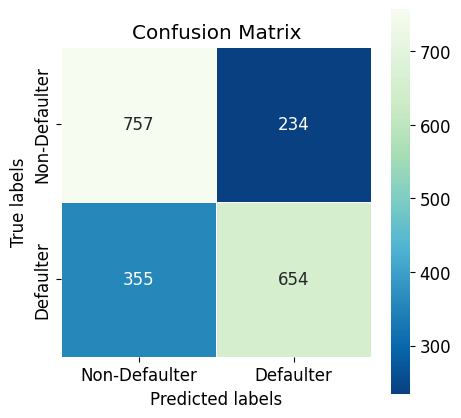

In [132]:
cm_Random_Forest_best = confusion_matrix(y_test, y_pred_Random_Forest_best_test)

mpl.rcParams['pdf.fonttype']=42
mpl.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(20, 20)
plt.rcParams['figure.dpi'] = 100


colors=sns.color_palette('rocket', 5)

fig = plt.figure(figsize=(5, 5))

ax = plt.subplot()
sns.heatmap(cm_Random_Forest_best, cmap='GnBu_r', annot=True, fmt='g', ax=ax, square=True, linecolor='white', linewidth=0.5)  # Annot=True to annotate cells, fmt='g' to disable scientific notation

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Non-Defaulter', 'Defaulter'])
ax.yaxis.set_ticklabels(['Non-Defaulter', 'Defaulter'])
plt.show()

The confusion matrix shows 483 + 480 = 963 correct predictions and 161 + 128 = 289 incorrect predictions.

* True Positives (Actual Positive:1 and Predict Positive:1) - 483
* True Negatives (Actual Negative:0 and Predict Negative:0) - 480
* False Positives (Actual Negative:0 but Predict Positive:1) - 161 (Type I error)
* False Negatives (Actual Positive:1 but Predict Negative:0) - 128 (Type II error)

In [133]:
from sklearn.metrics import accuracy_score, f1_score, log_loss, precision_score, recall_score, roc_auc_score

Random_Forest_best_Accuracy_score = accuracy_score(y_test, y_pred_Random_Forest_best_test)
print('Accuracy Score: {:.4f}'.format(Random_Forest_best_Accuracy_score))

Random_Forest_best_F1_score = f1_score(y_test, y_pred_Random_Forest_best_test, average="binary")
print('F1 Score: {:.4f}'.format(Random_Forest_best_F1_score))

Random_Forest_best_Log_loss = log_loss(y_test, y_pred_Random_Forest_best_test)
print('Log Loss: {:.4f}'.format(Random_Forest_best_Log_loss))

Random_Forest_best_Precision_score = precision_score(y_test, y_pred_Random_Forest_best_test)
print('Precision Score: {:.4f}'.format(Random_Forest_best_Precision_score))

Random_Forest_best_Recall_score = recall_score(y_test, y_pred_Random_Forest_best_test)
print('Recall Score: {:.4f}'.format(Random_Forest_best_Recall_score))

Random_Forest_best_Roc_auc_score = roc_auc_score(y_test, y_pred_Random_Forest_best_test)
print('ROC-AUC Score: {:.4f}'.format(Random_Forest_best_Roc_auc_score))

Accuracy Score: 0.7055
F1 Score: 0.6895
Log Loss: 10.6149
Precision Score: 0.7365
Recall Score: 0.6482
ROC-AUC Score: 0.7060


### SIN HACER DUMMIES TODAS LAS CATEGÓRICAS PORQUE SE SESGA MÁS 

In [181]:
# Set 'category' type to categorical attributes
for i in ['SEX', 'EDUCATION', 'MARRIAGE']:
  df[i] = df[i].astype('category')

# one-hot encoding
df=pd.concat([pd.get_dummies(df['SEX'], prefix='SEX'),
                pd.get_dummies(df['EDUCATION'], prefix='EDUCATION'), 
                pd.get_dummies(df['MARRIAGE'], prefix='MARRIAGE'),          
                df],axis=1)

# drop original columns
df.drop(['EDUCATION'],axis=1, inplace=True)
df.drop(['SEX'],axis=1, inplace=True)
df.drop(['MARRIAGE'],axis=1, inplace=True)

# print samples
df.head()

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,LIMIT_BAL,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,0,1,0,1,0,0,1,0,0,20000,...,0,0,0,0,689,0,0,0,0,1
1,0,1,0,1,0,0,0,1,0,120000,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,0,1,0,1,0,0,0,1,0,90000,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0,1,0,1,0,0,1,0,0,50000,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,1,0,0,1,0,0,1,0,0,50000,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Aleatory sample

In [182]:
# shuffle the dataframe rows
df = df.sample(frac=1, random_state=42)

# select 5000 samples from each category
sample_size = 5000
category_a_sample = df[df['DEFAULT'] == 0].sample(n=sample_size, random_state=42)
category_b_sample = df[df['DEFAULT'] == 1].sample(n=sample_size, random_state=42)

# concatenate the two samples
dff = pd.concat([category_a_sample, category_b_sample])

 # shuffle the rows randomly
dff = dff.sample(frac=1, random_state=42) 

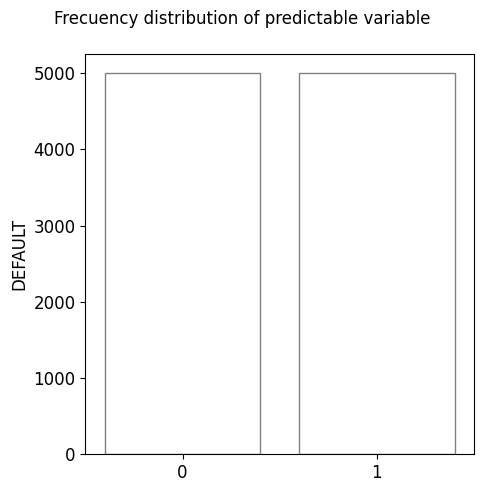

In [183]:
#Target 
plt.figure(figsize=(5, 5))
sns.barplot(x=dff['DEFAULT'].value_counts().index, y=dff['DEFAULT'].value_counts(),
                errcolor='.5', linewidth=1, edgecolor='.5', facecolor=(0, 0, 0, 0))
plt.suptitle('Frecuency distribution of predictable variable', ha='center', fontsize=12)
plt.tight_layout()
plt.show()

**It is important that the target variable is balanced because it affects the performance and interpretation of machine learning models. Having a balanced target variable ensures that the model has an equal representation of both classes, making it more likely to perform well on both classes. Therefore, were selected randomly samples wiht the half number of samples of each category of the target and thus have a balanced sample.**

In [184]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [185]:
import pandas as pd
import numpy as np
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [186]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import shap

# Split the data into features and target variable
X = dff.drop('DEFAULT', axis=1)
y = dff['DEFAULT']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [187]:
# Check dimensions
print(np.shape(X_train))
print(np.shape(X_test))

print("Training set:")
print(f"  Non-defaulters (y=0): {len(y_train[y_train==0])}")
print(f"  Defaulters (y=1):\t {len(y_train[y_train==1])}")

print("Test set:")
print(f"  Non-defaulters (y=0): {len(y_test[y_test==0])}")
print(f"  Defaulters (y=1):\t {len(y_test[y_test==1])}")

(8000, 29)
(2000, 29)
Training set:
  Non-defaulters (y=0): 4009
  Defaulters (y=1):	 3991
Test set:
  Non-defaulters (y=0): 991
  Defaulters (y=1):	 1009


**By combining grid search and cross-validation, we can identify the optimal hyperparameters for a machine learning model while obtaining a reliable estimate of its performance. This is especially important when working with complex models or datasets, as it helps to ensure that the model is well-tuned and generalizes well to new data.**

In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Model
Random_Forest = RandomForestClassifier(max_depth=3, random_state=123).fit(X_train, y_train)
y_pred_Random_Forest = Random_Forest.predict(X_test)

# Score
print('Classification Report:\n', classification_report(y_test, y_pred_Random_Forest))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_Random_Forest))
Random_Forest_train_acc = Random_Forest.score(X_train, y_train)
print('Training Score:', Random_Forest_train_acc)
Random_Forest_test_acc = Random_Forest.score(X_test, y_test)
print('Testing Score:', Random_Forest_test_acc)

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.85      0.75       991
           1       0.80      0.59      0.68      1009

    accuracy                           0.72      2000
   macro avg       0.73      0.72      0.71      2000
weighted avg       0.73      0.72      0.71      2000

Confusion Matrix:
 [[840 151]
 [416 593]]
Training Score: 0.712
Testing Score: 0.7165


**The accuracy score of the training set is 0.712 , while the accuracy of the test set is 0.7165. These two values ​​are quite comparable. Therefore, there are no signs of overfitting.**

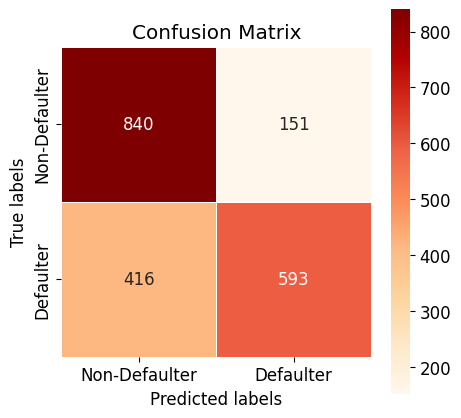

In [189]:
import matplotlib as mpl
# Performance
from sklearn.metrics import confusion_matrix

cm_Random_Forest = confusion_matrix(y_test, y_pred_Random_Forest)

mpl.rcParams['pdf.fonttype']=42
mpl.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(20, 20)
plt.rcParams['figure.dpi'] = 100

colors=sns.color_palette('rocket', 5)

fig = plt.figure(figsize=(5, 5))

ax = plt.subplot()
sns.heatmap(cm_Random_Forest, cmap='OrRd', annot=True, fmt='g', ax=ax, square=True, linecolor='white', linewidth=0.5)  # Annot=True to annotate cells, fmt='g' to disable scientific notation

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Non-Defaulter', 'Defaulter'])
ax.yaxis.set_ticklabels(['Non-Defaulter', 'Defaulter'])
plt.show()

**The confusion matrix shows 840 + 593 = 1433 correct predictions and 151 + 416 = 567 incorrect predictions.**

* **True Positives (Actual Positive:1 and Predict Positive:1) - 840**
* **True Negatives (Actual Negative:0 and Predict Negative:0) - 593**
* **False Positives (Actual Negative:0 but Predict Positive:1) - 151 (Type I error)**
* **False Negatives (Actual Positive:1 but Predict Negative:0) - 416 (Type II error)**

In [190]:
from sklearn.metrics import accuracy_score, f1_score, log_loss, precision_score, recall_score, roc_auc_score

Random_Forest_Accuracy_score = accuracy_score(y_test, y_pred_Random_Forest)
print('Accuracy Score: {:.4f}'.format(Random_Forest_Accuracy_score))

Random_Forest_F1_score = f1_score(y_test, y_pred_Random_Forest, average="binary")
print('F1 Score: {:.4f}'.format(Random_Forest_F1_score))

Random_Forest_Log_loss = log_loss(y_test, y_pred_Random_Forest)
print('Log Loss: {:.4f}'.format(Random_Forest_Log_loss))

Random_Forest_Precision_score = precision_score(y_test, y_pred_Random_Forest)
print('Precision Score: {:.4f}'.format(Random_Forest_Precision_score))

Random_Forest_Recall_score = recall_score(y_test, y_pred_Random_Forest)
print('Recall Score: {:.4f}'.format(Random_Forest_Recall_score))

Random_Forest_Roc_auc_score = roc_auc_score(y_test, y_pred_Random_Forest)
print('ROC-AUC Score: {:.4f}'.format(Random_Forest_Roc_auc_score))

Accuracy Score: 0.7165
F1 Score: 0.6766
Log Loss: 10.2184
Precision Score: 0.7970
Recall Score: 0.5877
ROC-AUC Score: 0.7177


In [191]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score
# Grid of evaluated hyperparameters Tunning
# ==============================================================================
param_grid = {'n_estimators': [150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20],
              'criterion'   : ['gini', 'entropy']
             }

# Grid search with cross validation
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        cv         = StratifiedKFold(n_splits=5, shuffle=True, random_state = 123),
        scoring    = 'recall',
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Results
# ==============================================================================
results = pd.DataFrame(grid.cv_results_)
results.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
9,gini,20,5,150,0.646697,0.025772,0.992170,0.002335
22,entropy,20,7,150,0.642441,0.019588,0.993611,0.003288
23,entropy,20,9,150,0.641689,0.023897,0.994675,0.001645
10,gini,20,7,150,0.640937,0.024397,0.993172,0.001674


In [192]:
# S Get the score and top 5
score_df = pd.DataFrame(grid.cv_results_)
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
9,3.041050,0.659627,0.085778,0.005290,gini,20,5,150,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.679599,...,0.646697,0.025772,1,0.991541,0.989352,0.994049,0.990291,0.995615,0.992170,0.002335
22,4.520200,0.358452,0.080846,0.008736,entropy,20,7,150,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.662078,...,0.642441,0.019588,2,0.994674,0.990604,0.995929,0.989039,0.997808,0.993611,0.003288
23,5.777539,0.517430,0.076587,0.008003,entropy,20,9,150,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.660826,...,0.641689,0.023897,3,0.994048,0.994989,0.996555,0.991857,0.995929,0.994675,0.001645
10,3.592722,0.407011,0.080820,0.011297,gini,20,7,150,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.663329,...,0.640937,0.024397,4,0.993108,0.990291,0.994676,0.992797,0.994989,0.993172,0.001674
21,3.988159,0.644903,0.082163,0.009274,entropy,20,5,150,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.663329,...,0.638180,0.022334,5,0.990915,0.991231,0.994676,0.989352,0.991544,0.991543,0.001738


In [193]:
# Definir los parametros para el mejor modelo
Random_Forest_best = grid.best_estimator_

In [195]:
y_pred_Random_Forest_best_test = Random_Forest_best.predict(X_test)
y_pred_Random_Forest_best_train = Random_Forest_best.predict(X_train)

# Score test
print('Test Classification Report:\n', classification_report(y_test, y_pred_Random_Forest_best_test))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_Random_Forest_best_test))
Random_Forest_best_test_acc = Random_Forest_best.score(X_test, y_test)
print('Testing Accuracy:', Random_Forest_best_test_acc)

# Score train
print('Train Classification Report:\n', classification_report(y_train, y_pred_Random_Forest_best_train))
print('Confusion Matrix:\n', confusion_matrix(y_train, y_pred_Random_Forest_best_train))
Random_Forest_best_train_acc = Random_Forest_best.score(X_train, y_train)
print('Training Accuracy:', Random_Forest_best_train_acc)

Test Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.79      0.73       991
           1       0.76      0.64      0.69      1009

    accuracy                           0.72      2000
   macro avg       0.72      0.72      0.71      2000
weighted avg       0.72      0.72      0.71      2000

Confusion Matrix:
 [[786 205]
 [363 646]]
Testing Accuracy: 0.716
Train Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4009
           1       0.99      0.99      0.99      3991

    accuracy                           0.99      8000
   macro avg       0.99      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000

Confusion Matrix:
 [[3979   30]
 [  40 3951]]
Training Accuracy: 0.99125


<font color='red'>La puntuación de precisión del conjunto de entrenamiento es $0.9284$, mientras que la precisión del conjunto de prueba es $0.7691$. Pueden ser signos de sobreajuste.</font> 

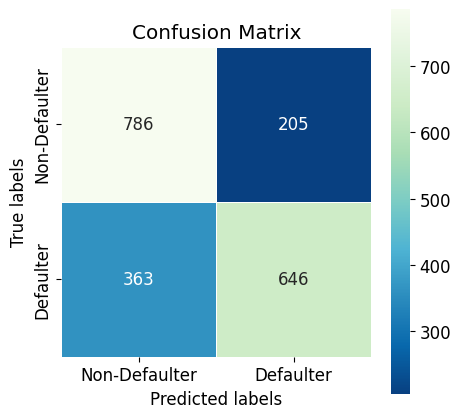

In [196]:
cm_Random_Forest_best = confusion_matrix(y_test, y_pred_Random_Forest_best_test)

mpl.rcParams['pdf.fonttype']=42
mpl.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(20, 20)
plt.rcParams['figure.dpi'] = 100


colors=sns.color_palette('rocket', 5)

fig = plt.figure(figsize=(5, 5))

ax = plt.subplot()
sns.heatmap(cm_Random_Forest_best, cmap='GnBu_r', annot=True, fmt='g', ax=ax, square=True, linecolor='white', linewidth=0.5)  # Annot=True to annotate cells, fmt='g' to disable scientific notation

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Non-Defaulter', 'Defaulter'])
ax.yaxis.set_ticklabels(['Non-Defaulter', 'Defaulter'])
plt.show()

The confusion matrix shows 483 + 480 = 963 correct predictions and 161 + 128 = 289 incorrect predictions.

* True Positives (Actual Positive:1 and Predict Positive:1) - 483
* True Negatives (Actual Negative:0 and Predict Negative:0) - 480
* False Positives (Actual Negative:0 but Predict Positive:1) - 161 (Type I error)
* False Negatives (Actual Positive:1 but Predict Negative:0) - 128 (Type II error)

In [197]:
from sklearn.metrics import accuracy_score, f1_score, log_loss, precision_score, recall_score, roc_auc_score

Random_Forest_best_Accuracy_score = accuracy_score(y_test, y_pred_Random_Forest_best_test)
print('Accuracy Score: {:.4f}'.format(Random_Forest_best_Accuracy_score))

Random_Forest_best_F1_score = f1_score(y_test, y_pred_Random_Forest_best_test, average="binary")
print('F1 Score: {:.4f}'.format(Random_Forest_best_F1_score))

Random_Forest_best_Log_loss = log_loss(y_test, y_pred_Random_Forest_best_test)
print('Log Loss: {:.4f}'.format(Random_Forest_best_Log_loss))

Random_Forest_best_Precision_score = precision_score(y_test, y_pred_Random_Forest_best_test)
print('Precision Score: {:.4f}'.format(Random_Forest_best_Precision_score))

Random_Forest_best_Recall_score = recall_score(y_test, y_pred_Random_Forest_best_test)
print('Recall Score: {:.4f}'.format(Random_Forest_best_Recall_score))

Random_Forest_best_Roc_auc_score = roc_auc_score(y_test, y_pred_Random_Forest_best_test)
print('ROC-AUC Score: {:.4f}'.format(Random_Forest_best_Roc_auc_score))

Accuracy Score: 0.7160
F1 Score: 0.6946
Log Loss: 10.2364
Precision Score: 0.7591
Recall Score: 0.6402
ROC-AUC Score: 0.7167


### Feature selection

**Feature selection is an important part of the Random Forest modeling process, as it can help improve accuracy and avoid overfitting. There are different methods to make this selection such as: Importance of features based on trees, selection based on models, selection based on correlation, selection based on SHAP importance, this last method will be selected in this project because  SHAP offers a powerful and flexible approach to feature selection that is highly interpretable and model-agnostic. By using SHAP to select features, we can gain a better understanding of how our models are making predictions and identify the most important features for a given task.**

In [198]:
shap_values = shap.TreeExplainer(Random_Forest).shap_values(X_train)

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


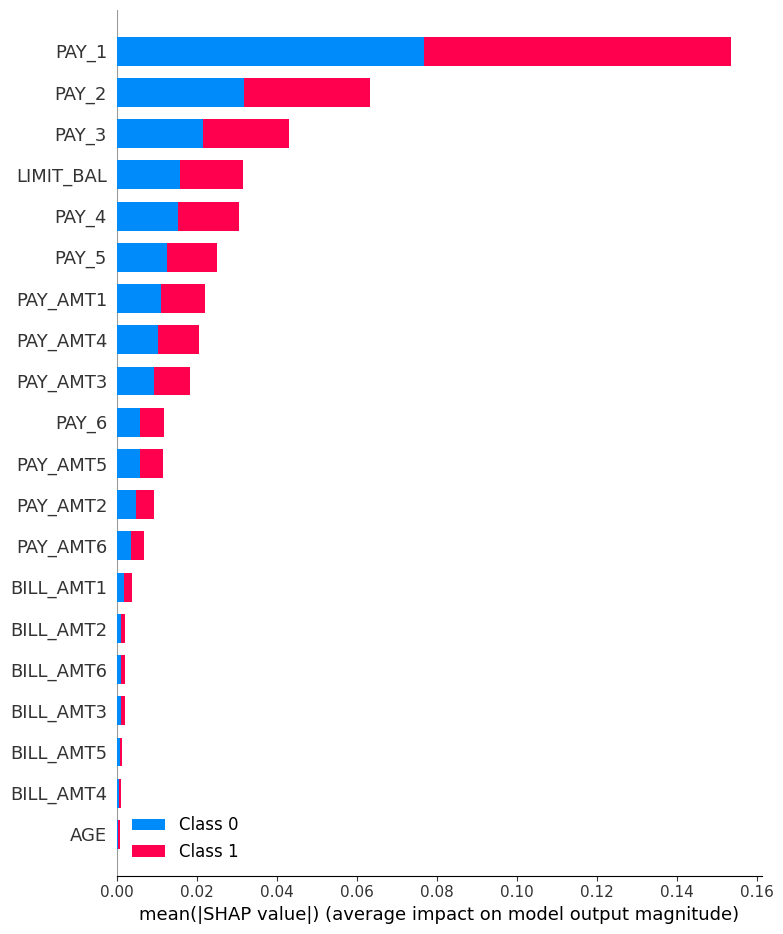

In [199]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

**Based on the most relevant characteristics obtained with SHAP, the 9 features that have the most influence on the model will be selected, this will allow us to have a more compact and probably more generalizable model.**

In [201]:
dff = dff[['PAY_1', 'PAY_2', 'PAY_3', 'LIMIT_BAL', 'PAY_4', 'PAY_5', 'PAY_AMT1', 'PAY_AMT4', 'PAY_AMT3', 'PAY_6', 'PAY_AMT5', 'PAY_AMT2', 'PAY_AMT6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT6', 'BILL_AMT3', 'BILL_AMT5', 'BILL_AMT4','AGE', 'DEFAULT']]


### MODELADO MEJORADO CORREGIR NOMBRE ACÁ 


In [202]:
# Split the new data into features and target variable
X = dff.drop('DEFAULT', axis=1)
y = dff['DEFAULT']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [203]:
# Check dimensions
print(np.shape(X_train))
print(np.shape(X_test))

print("Training set:")
print(f"  Non-defaulters (y=0): {len(y_train[y_train==0])}")
print(f"  Defaulters (y=1):\t {len(y_train[y_train==1])}")

print("Test set:")
print(f"  Non-defaulters (y=0): {len(y_test[y_test==0])}")
print(f"  Defaulters (y=1):\t {len(y_test[y_test==1])}")

(8000, 20)
(2000, 20)
Training set:
  Non-defaulters (y=0): 4009
  Defaulters (y=1):	 3991
Test set:
  Non-defaulters (y=0): 991
  Defaulters (y=1):	 1009


In [204]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Model
Random_Forest = RandomForestClassifier(max_depth=3, random_state=123).fit(X_train, y_train)
y_pred_Random_Forest = Random_Forest.predict(X_test)

# Score
print('Classification Report:\n', classification_report(y_test, y_pred_Random_Forest))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_Random_Forest))
Random_Forest_train_acc = Random_Forest.score(X_train, y_train)
print('Training Score:', Random_Forest_train_acc)
Random_Forest_test_acc = Random_Forest.score(X_test, y_test)
print('Testing Score:', Random_Forest_test_acc)

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.85      0.75       991
           1       0.80      0.59      0.68      1009

    accuracy                           0.72      2000
   macro avg       0.73      0.72      0.71      2000
weighted avg       0.74      0.72      0.71      2000

Confusion Matrix:
 [[841 150]
 [413 596]]
Training Score: 0.710375
Testing Score: 0.7185


**The accuracy score of the training set is 0.712 , while the accuracy of the test set is 0.7165. These two values ​​are quite comparable. Therefore, there are no signs of overfitting.**

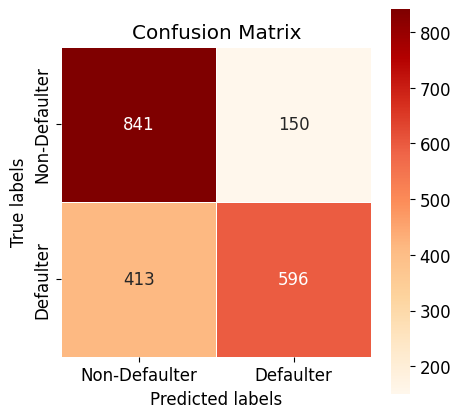

In [205]:
import matplotlib as mpl
# Performance
from sklearn.metrics import confusion_matrix

cm_Random_Forest = confusion_matrix(y_test, y_pred_Random_Forest)

mpl.rcParams['pdf.fonttype']=42
mpl.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(20, 20)
plt.rcParams['figure.dpi'] = 100

colors=sns.color_palette('rocket', 5)

fig = plt.figure(figsize=(5, 5))

ax = plt.subplot()
sns.heatmap(cm_Random_Forest, cmap='OrRd', annot=True, fmt='g', ax=ax, square=True, linecolor='white', linewidth=0.5)  # Annot=True to annotate cells, fmt='g' to disable scientific notation

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Non-Defaulter', 'Defaulter'])
ax.yaxis.set_ticklabels(['Non-Defaulter', 'Defaulter'])
plt.show()

**The confusion matrix shows 840 + 593 = 1433 correct predictions and 151 + 416 = 567 incorrect predictions.**

* **True Positives (Actual Positive:1 and Predict Positive:1) - 840**
* **True Negatives (Actual Negative:0 and Predict Negative:0) - 593**
* **False Positives (Actual Negative:0 but Predict Positive:1) - 151 (Type I error)**
* **False Negatives (Actual Positive:1 but Predict Negative:0) - 416 (Type II error)**

In [206]:
from sklearn.metrics import accuracy_score, f1_score, log_loss, precision_score, recall_score, roc_auc_score

Random_Forest_Accuracy_score = accuracy_score(y_test, y_pred_Random_Forest)
print('Accuracy Score: {:.4f}'.format(Random_Forest_Accuracy_score))

Random_Forest_F1_score = f1_score(y_test, y_pred_Random_Forest, average="binary")
print('F1 Score: {:.4f}'.format(Random_Forest_F1_score))

Random_Forest_Log_loss = log_loss(y_test, y_pred_Random_Forest)
print('Log Loss: {:.4f}'.format(Random_Forest_Log_loss))

Random_Forest_Precision_score = precision_score(y_test, y_pred_Random_Forest)
print('Precision Score: {:.4f}'.format(Random_Forest_Precision_score))

Random_Forest_Recall_score = recall_score(y_test, y_pred_Random_Forest)
print('Recall Score: {:.4f}'.format(Random_Forest_Recall_score))

Random_Forest_Roc_auc_score = roc_auc_score(y_test, y_pred_Random_Forest)
print('ROC-AUC Score: {:.4f}'.format(Random_Forest_Roc_auc_score))

Accuracy Score: 0.7185
F1 Score: 0.6792
Log Loss: 10.1463
Precision Score: 0.7989
Recall Score: 0.5907
ROC-AUC Score: 0.7197


In [207]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score
# Grid of evaluated hyperparameters Tunning
# ==============================================================================
param_grid = {'n_estimators': [150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20],
              'criterion'   : ['gini', 'entropy']
             }

# Grid search with cross validation
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        cv         = StratifiedKFold(n_splits=5, shuffle=True, random_state = 123),
        scoring    = 'recall',
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Results
# ==============================================================================
results = pd.DataFrame(grid.cv_results_)
results.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
1,gini,None,7,150,0.640437,0.019216,0.999749,0.000307
11,gini,20,9,150,0.640189,0.022463,0.991606,0.002305
9,gini,20,5,150,0.639433,0.022075,0.990165,0.002255
10,gini,20,7,150,0.637433,0.025286,0.991356,0.002349


In [208]:
# S Get the score and top 5
score_df = pd.DataFrame(grid.cv_results_)
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,4.839141,0.320590,0.082842,0.011771,gini,None,7,150,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.658323,...,0.640437,0.019216,1,1.000000,1.000000,0.999374,0.999374,1.000000,0.999749,0.000307
11,6.082079,0.901774,0.076852,0.007098,gini,20,9,150,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.647059,...,0.640189,0.022463,2,0.991541,0.988412,0.993110,0.989978,0.994989,0.991606,0.002305
9,3.506665,0.421263,0.077974,0.005697,gini,20,5,150,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.663329,...,0.639433,0.022075,3,0.991541,0.987159,0.991544,0.987786,0.992797,0.990165,0.002255
10,4.762484,0.274265,0.086045,0.016190,gini,20,7,150,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.642053,...,0.637433,0.025286,4,0.992168,0.988099,0.992484,0.989352,0.994676,0.991356,0.002349
22,6.545123,0.771175,0.081218,0.009950,entropy,20,7,150,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.653317,...,0.637180,0.021487,5,0.993108,0.991231,0.995929,0.989039,0.995302,0.992922,0.002557


In [209]:
# Definir los parametros para el mejor modelo
Random_Forest_best = grid.best_estimator_

In [210]:
y_pred_Random_Forest_best_test = Random_Forest_best.predict(X_test)
y_pred_Random_Forest_best_train = Random_Forest_best.predict(X_train)

# Score test
print('Test Classification Report:\n', classification_report(y_test, y_pred_Random_Forest_best_test))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_Random_Forest_best_test))
Random_Forest_best_test_acc = Random_Forest_best.score(X_test, y_test)
print('Testing Accuracy:', Random_Forest_best_test_acc)

# Score train
print('Train Classification Report:\n', classification_report(y_train, y_pred_Random_Forest_best_train))
print('Confusion Matrix:\n', confusion_matrix(y_train, y_pred_Random_Forest_best_train))
Random_Forest_best_train_acc = Random_Forest_best.score(X_train, y_train)
print('Training Accuracy:', Random_Forest_best_train_acc)

Test Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.77      0.72       991
           1       0.74      0.64      0.69      1009

    accuracy                           0.71      2000
   macro avg       0.71      0.71      0.70      2000
weighted avg       0.71      0.71      0.70      2000

Confusion Matrix:
 [[766 225]
 [364 645]]
Testing Accuracy: 0.7055
Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4009
           1       1.00      1.00      1.00      3991

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Confusion Matrix:
 [[4004    5]
 [   3 3988]]
Training Accuracy: 0.999


<font color='red'>La puntuación de precisión del conjunto de entrenamiento es $0.9284$, mientras que la precisión del conjunto de prueba es $0.7691$. Pueden ser signos de sobreajuste.</font> 

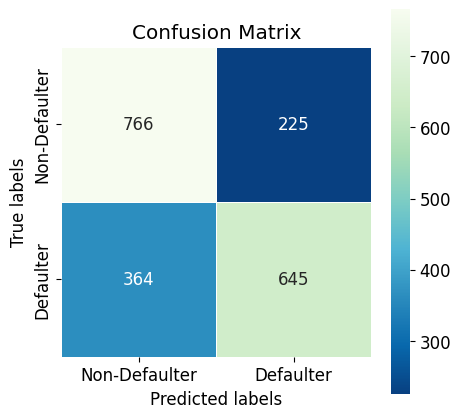

In [211]:
cm_Random_Forest_best = confusion_matrix(y_test, y_pred_Random_Forest_best_test)

mpl.rcParams['pdf.fonttype']=42
mpl.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(20, 20)
plt.rcParams['figure.dpi'] = 100


colors=sns.color_palette('rocket', 5)

fig = plt.figure(figsize=(5, 5))

ax = plt.subplot()
sns.heatmap(cm_Random_Forest_best, cmap='GnBu_r', annot=True, fmt='g', ax=ax, square=True, linecolor='white', linewidth=0.5)  # Annot=True to annotate cells, fmt='g' to disable scientific notation

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Non-Defaulter', 'Defaulter'])
ax.yaxis.set_ticklabels(['Non-Defaulter', 'Defaulter'])
plt.show()

The confusion matrix shows 483 + 480 = 963 correct predictions and 161 + 128 = 289 incorrect predictions.

* True Positives (Actual Positive:1 and Predict Positive:1) - 483
* True Negatives (Actual Negative:0 and Predict Negative:0) - 480
* False Positives (Actual Negative:0 but Predict Positive:1) - 161 (Type I error)
* False Negatives (Actual Positive:1 but Predict Negative:0) - 128 (Type II error)

In [212]:
from sklearn.metrics import accuracy_score, f1_score, log_loss, precision_score, recall_score, roc_auc_score

Random_Forest_best_Accuracy_score = accuracy_score(y_test, y_pred_Random_Forest_best_test)
print('Accuracy Score: {:.4f}'.format(Random_Forest_best_Accuracy_score))

Random_Forest_best_F1_score = f1_score(y_test, y_pred_Random_Forest_best_test, average="binary")
print('F1 Score: {:.4f}'.format(Random_Forest_best_F1_score))

Random_Forest_best_Log_loss = log_loss(y_test, y_pred_Random_Forest_best_test)
print('Log Loss: {:.4f}'.format(Random_Forest_best_Log_loss))

Random_Forest_best_Precision_score = precision_score(y_test, y_pred_Random_Forest_best_test)
print('Precision Score: {:.4f}'.format(Random_Forest_best_Precision_score))

Random_Forest_best_Recall_score = recall_score(y_test, y_pred_Random_Forest_best_test)
print('Recall Score: {:.4f}'.format(Random_Forest_best_Recall_score))

Random_Forest_best_Roc_auc_score = roc_auc_score(y_test, y_pred_Random_Forest_best_test)
print('ROC-AUC Score: {:.4f}'.format(Random_Forest_best_Roc_auc_score))

Accuracy Score: 0.7055
F1 Score: 0.6865
Log Loss: 10.6149
Precision Score: 0.7414
Recall Score: 0.6392
ROC-AUC Score: 0.7061


**Feature selection is an important part of the Random Forest modeling process, as it can help improve accuracy and avoid overfitting**

In this code, we train a Random Forest model on the training set and use SHAP values to rank the features. We then select the top N features and train a new Random Forest model using only those features. We use stratified k-fold cross-validation to evaluate the performance of the new model and report the precision with the mean plus-minus standard deviation. Note that in this code, we used precision as the evaluation metric, but you can change it to other metrics depending on your task.

# OOP

**To convert the above code into an Object-Oriented Programming (OOP) approach, we can create a class that encapsulates the model training, feature selection, and cross-validation steps. The class can have the following methods:**






1.   **__init__: This method can initialize the Random Forest model and the SHAP explainer.**

2.   **train: This method can train the Random Forest model on the input data.**

3.   **compute_feature_importance: This method can compute the SHAP values and feature importances.**

4.   **select_top_features: This method can select the top N features based on their importance.**

5.   **cross_validate: This method can perform cross-validation and return the precision scores.**

6.   **report: This method can print the mean and standard deviation of the precision scores.**

In [ ]:
import pandas as pd
import numpy as np
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [ ]:
class RandomForestWithSHAP:
    def __init__(self, n_estimators=100, random_state=42):
        self.rf = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
        self.explainer = None
    
    def train(self, X_train, y_train):
        self.rf.fit(X_train, y_train)
    
    def compute_feature_importance(self, X_train):
        self.explainer = shap.TreeExplainer(self.rf)
        self.shap_values = self.explainer.shap_values(X_train)
        self.mean_abs_shap = np.abs(self.shap_values).mean(axis=0)
    
    def select_top_features(self, N):
        feature_importance = pd.DataFrame(list(zip(X_train.columns, self.mean_abs_shap)), columns=['feature', 'importance'])
        feature_importance.sort_values(by='importance', ascending=False, inplace=True)
        self.top_features = feature_importance['feature'][:N]
    
    def cross_validate(self, X_train, y_train, cv=5, scoring='precision'):
        X_train_top = X_train[self.top_features]
        cv = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
        self.scores = cross_val_score(self.rf, X_train_top, y_train, cv=cv, scoring=scoring)
    
    def report(self):
        mean_precision = self.scores.mean()
        std_precision = self.scores.std()
        print("Precision: {:.3f} +/- {:.3f}".format(mean_precision, std_precision))

In [ ]:
#The class can be use as follow
rf_shap = RandomForestWithSHAP()
rf_shap.train(X_train, y_train)
rf_shap.compute_feature_importance(X_train)
rf_shap.select_top_features(N=10)
rf_shap.cross_validate(X_train, y_train)
rf_shap.report()

In [ ]:
#Firstly, we install the required packages:

!pip install SHAP
!pip install lime
!pip install Pillow==9.0.0 # The newest version results in plotting issues.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay

# Specifying our target variable:
target = 'DEFAULT'

# Seperating our target variable from our features:
y = result[target]
X = result.drop(target, axis = 1)

# Splitting the dataset into a 70% train and 30% test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 17)

# Initialize and fit the model:
rf = RandomForestClassifier(max_depth=10).fit(X_train, y_train)

# Predict: 
y_pred_rf = rf.predict(X_test)
y_pred_rf_train = rf.predict(X_train)

#Evaluate
print("Accuracy train set:", accuracy_score(y_train, y_pred_rf_train))
print("Accuracy test set:", accuracy_score(y_test, y_pred_rf))

cr = classification_report(y_test, y_pred_rf)
print(cr)

plot_roc_curve(rf, X_test, y_test)


from sklearn.metrics import plot_roc_curve
svc_disp = plot_roc_curve(svc, X_test, y_test)
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=svc_disp.ax_)
From sklearn 1.2:

from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=svc_disp.ax_)

In [ ]:
!pip plot_roc_curve from sklearn.metric